In [64]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [65]:
# Load the dataset
file_path = 'dementia_patients_health_data.csv'
data = pd.read_csv(file_path)
# Display the first few rows of the dataset to understand its structure
data.head()


,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Prescription,Dosage in mg,Age,...,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Medication_History,Nutrition_Diet,Sleep_Quality,Chronic_Health_Conditions,Dementia
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,NaN,NaN,60,...,Current Smoker,Negative,Sedentary,No,10,No,Low-Carb Diet,Poor,Diabetes,0
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,Galantamine,12.0,61,...,Former Smoker,Positive,Moderate Activity,No,1,Yes,Low-Carb Diet,Poor,Heart Disease,1
2,0,0.009000,89,93.566504,37.326321,59.759066,37.640435,NaN,NaN,69,...,Former Smoker,Negative,Moderate Activity,No,8,No,Mediterranean Diet,Poor,Heart Disease,0
3,0,0.086437,60,93.906510,37.030620,58.266471,50.673992,Donepezil,23.0,78,...,Never Smoked,Negative,Mild Activity,Yes,5,Yes,Balanced Diet,Poor,Hypertension,1
4,1,0.150747,67,97.508994,36.062121,67.705027,27.810601,Memantine,20.0,77,...,Never Smoked,Positive,Mild Activity,No,0,Yes,Low-Carb Diet,Good,Diabetes,1


In [66]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Check for any obvious data type issues
data_types = data.dtypes

missing_values, data_types


(Diabetic                       0
 AlcoholLevel                   0
 HeartRate                      0
 BloodOxygenLevel               0
 BodyTemperature                0
 Weight                         0
 MRI_Delay                      0
 Prescription                 515
 Dosage in mg                 515
 Age                            0
 Education_Level                0
 Dominant_Hand                  0
 Gender                         0
 Family_History                 0
 Smoking_Status                 0
 APOE_ε4                        0
 Physical_Activity              0
 Depression_Status              0
 Cognitive_Test_Scores          0
 Medication_History             0
 Nutrition_Diet                 0
 Sleep_Quality                  0
 Chronic_Health_Conditions    179
 Dementia                       0
 dtype: int64,
 Diabetic                       int64
 AlcoholLevel                 float64
 HeartRate                      int64
 BloodOxygenLevel             float64
 BodyTemperature 

In [67]:
# Handling missing values
data['Prescription'].fillna('None', inplace=True)
data['Dosage in mg'].fillna(0, inplace=True)

# Preparing categorical variables for analysis
# For simplicity, we'll use label encoding for ordinal variables and one-hot encoding for nominal variables without an inherent order.


# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Apply label encoding to columns with only two unique values
for col in categorical_columns:
    if len(data[col].unique()) == 2:
        data[col] = LabelEncoder().fit_transform(data[col])

# Apply one-hot encoding to other categorical variables
data = pd.get_dummies(data, columns=[col for col in categorical_columns if len(data[col].unique()) > 2])

# Check the transformed dataset
data.head()


,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Dosage in mg,Age,Dominant_Hand,...,Smoking_Status_Never Smoked,Physical_Activity_Mild Activity,Physical_Activity_Moderate Activity,Physical_Activity_Sedentary,Nutrition_Diet_Balanced Diet,Nutrition_Diet_Low-Carb Diet,Nutrition_Diet_Mediterranean Diet,Chronic_Health_Conditions_Diabetes,Chronic_Health_Conditions_Heart Disease,Chronic_Health_Conditions_Hypertension
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,0.0,60,0,...,False,False,False,True,False,True,False,True,False,False
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,12.0,61,1,...,False,False,True,False,False,True,False,False,True,False
2,0,0.009000,89,93.566504,37.326321,59.759066,37.640435,0.0,69,1,...,False,False,True,False,False,False,True,False,True,False
3,0,0.086437,60,93.906510,37.030620,58.266471,50.673992,23.0,78,0,...,True,True,False,False,True,False,False,False,False,True
4,1,0.150747,67,97.508994,36.062121,67.705027,27.810601,20.0,77,1,...,True,True,False,False,False,True,False,True,False,False


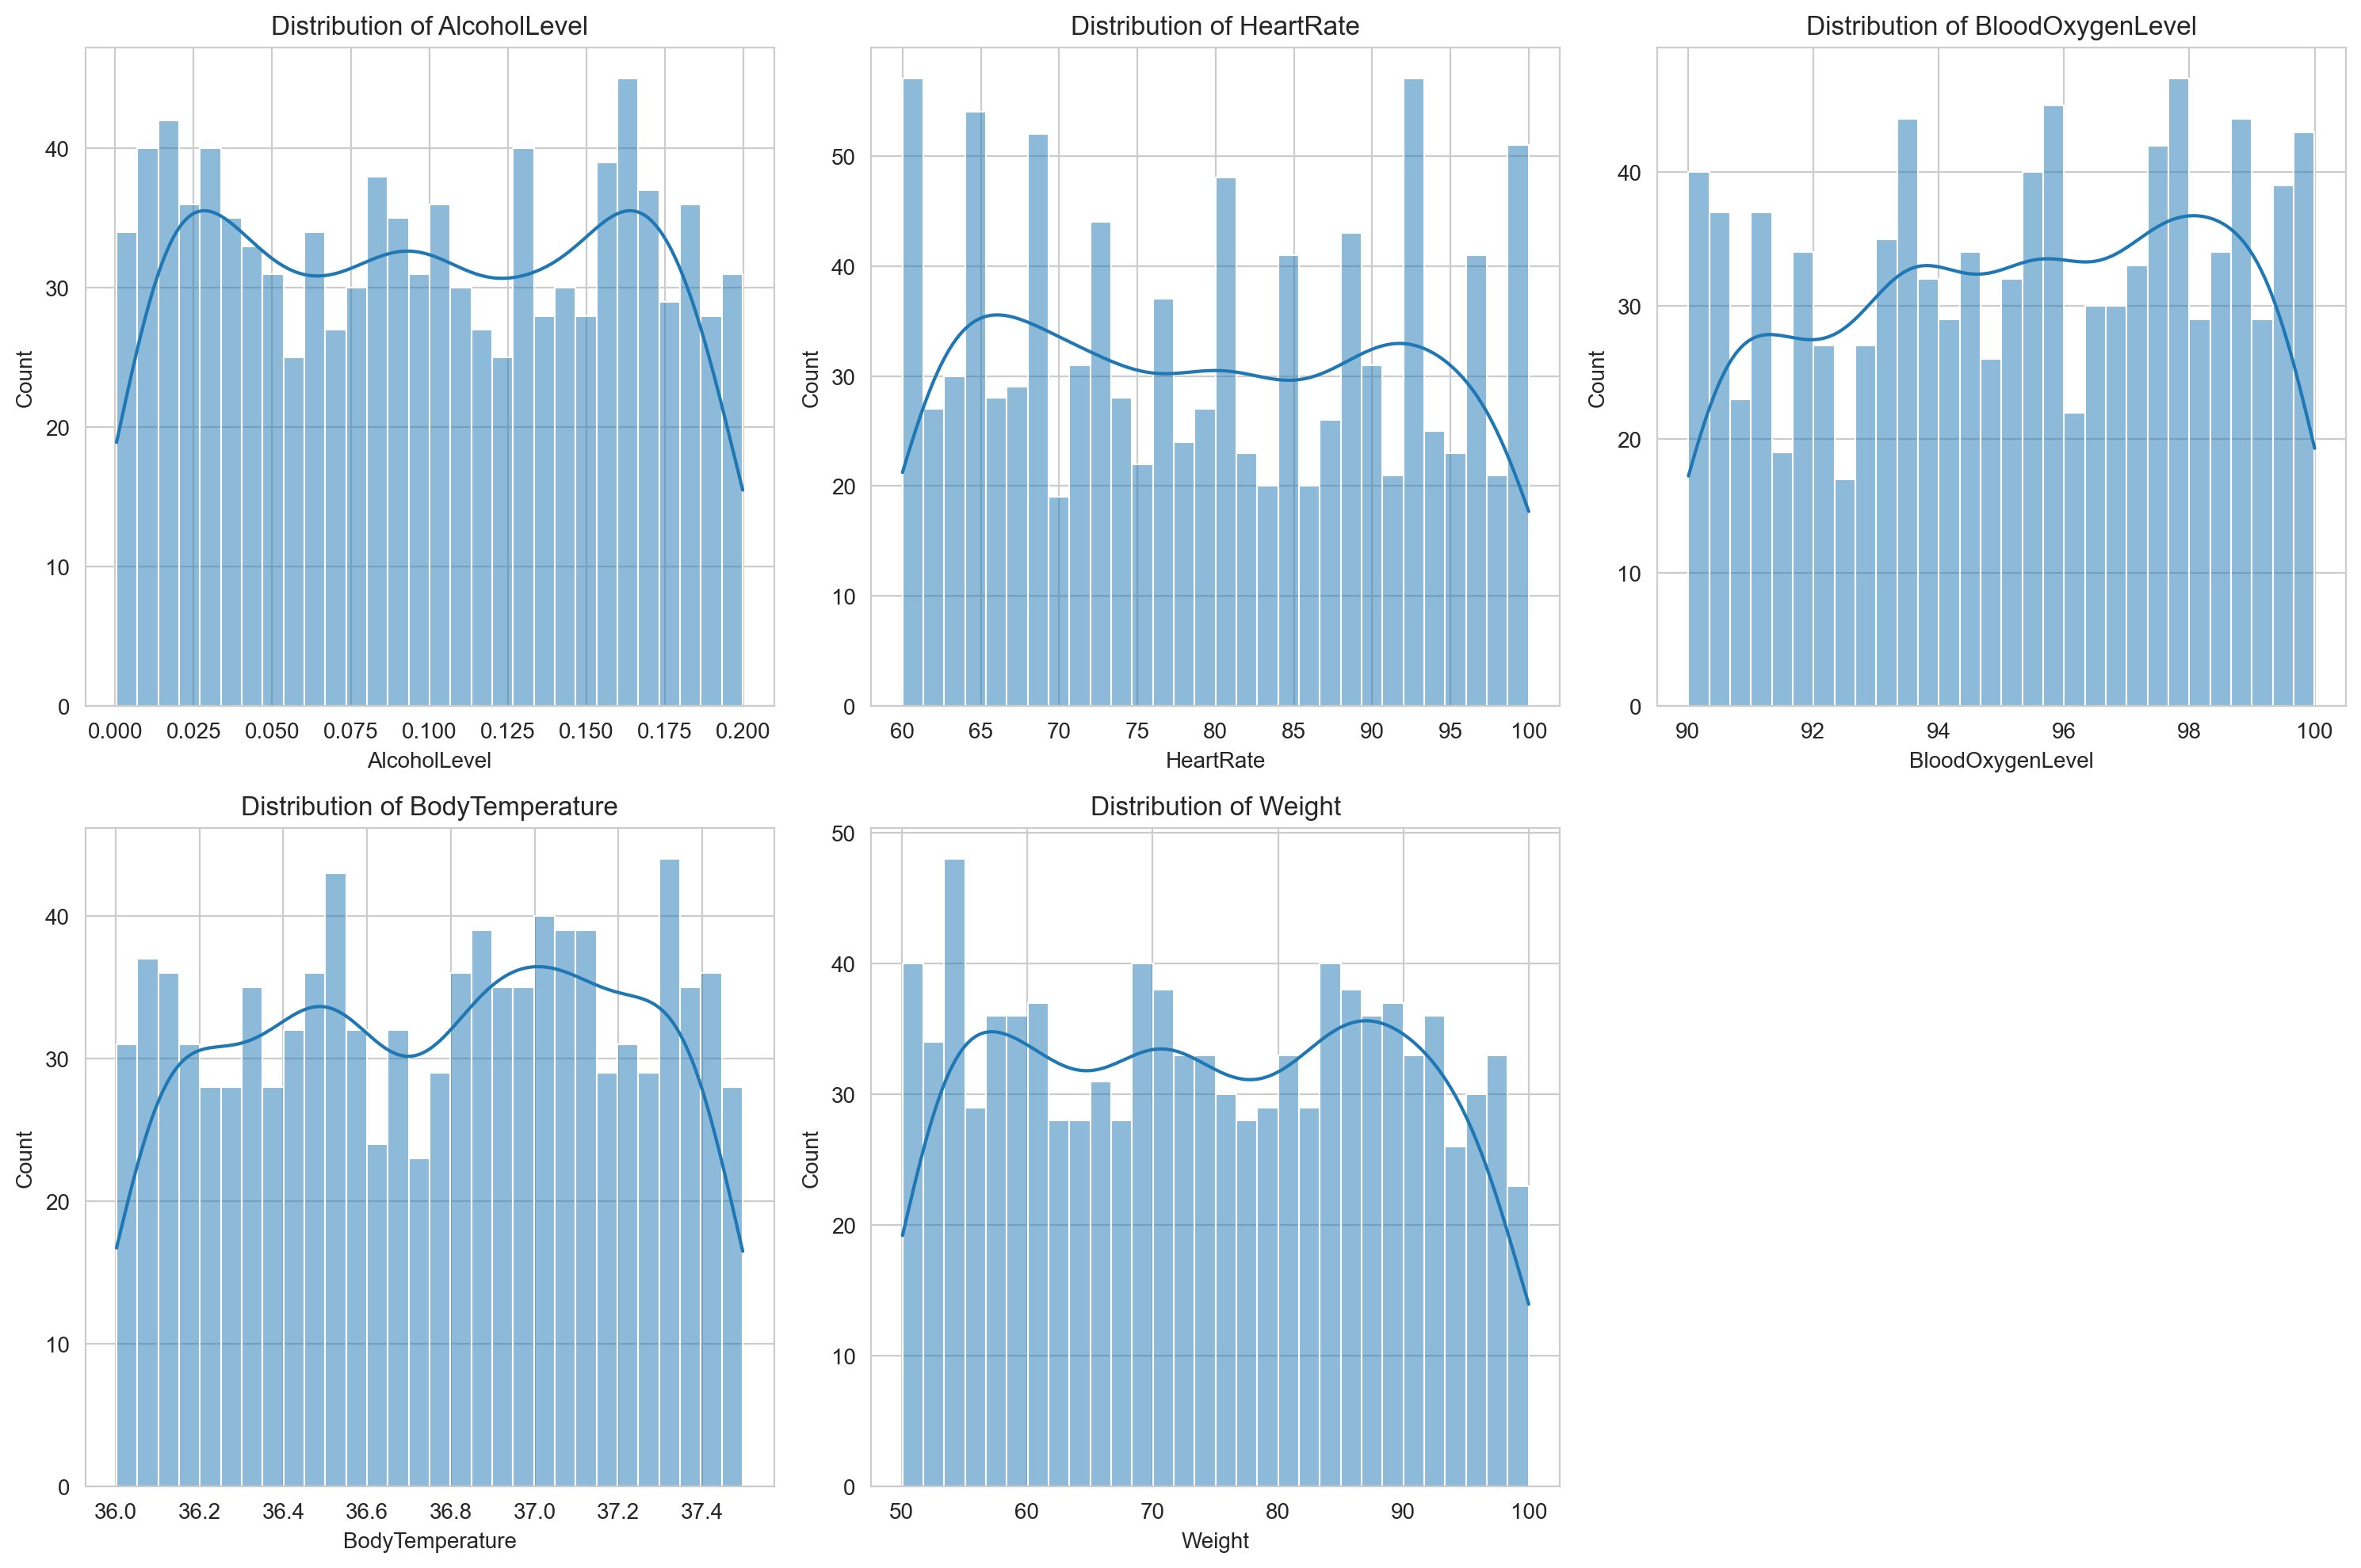

In [68]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")
# List of variables to plot
variables = ['AlcoholLevel', 'HeartRate', 'BloodOxygenLevel', 'BodyTemperature', 'Weight']
# Initialize the figure
plt.figure(figsize=(15, 10), dpi=200)
for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[var], kde=True, bins=30)
    plt.title(f'Distribution of {var}')
plt.tight_layout()
plt.savefig('distributions.png')
plt.show()


The histograms with kernel density estimates (KDE) provide insights into the distribution of key health metrics among the patients in the dataset:

AlcoholLevel: Most patients have lower alcohol levels, with the distribution skewed towards lower values, indicating that a majority consume alcohol sparingly or not at all.
HeartRate: The heart rate distribution appears somewhat normal, centering around a common resting rate, which suggests a typical variability in heart rate among patients.
BloodOxygenLevel: This metric also shows a distribution skewed towards higher values, as expected in a generally healthy population, but with some variability.
BodyTemperature: The body temperature of most patients hovers around the normal human body temperature, with a slight skew towards higher temperatures.
Weight: The weight distribution is relatively normal but with a noticeable spread, indicating a diverse patient population in terms of body weight.

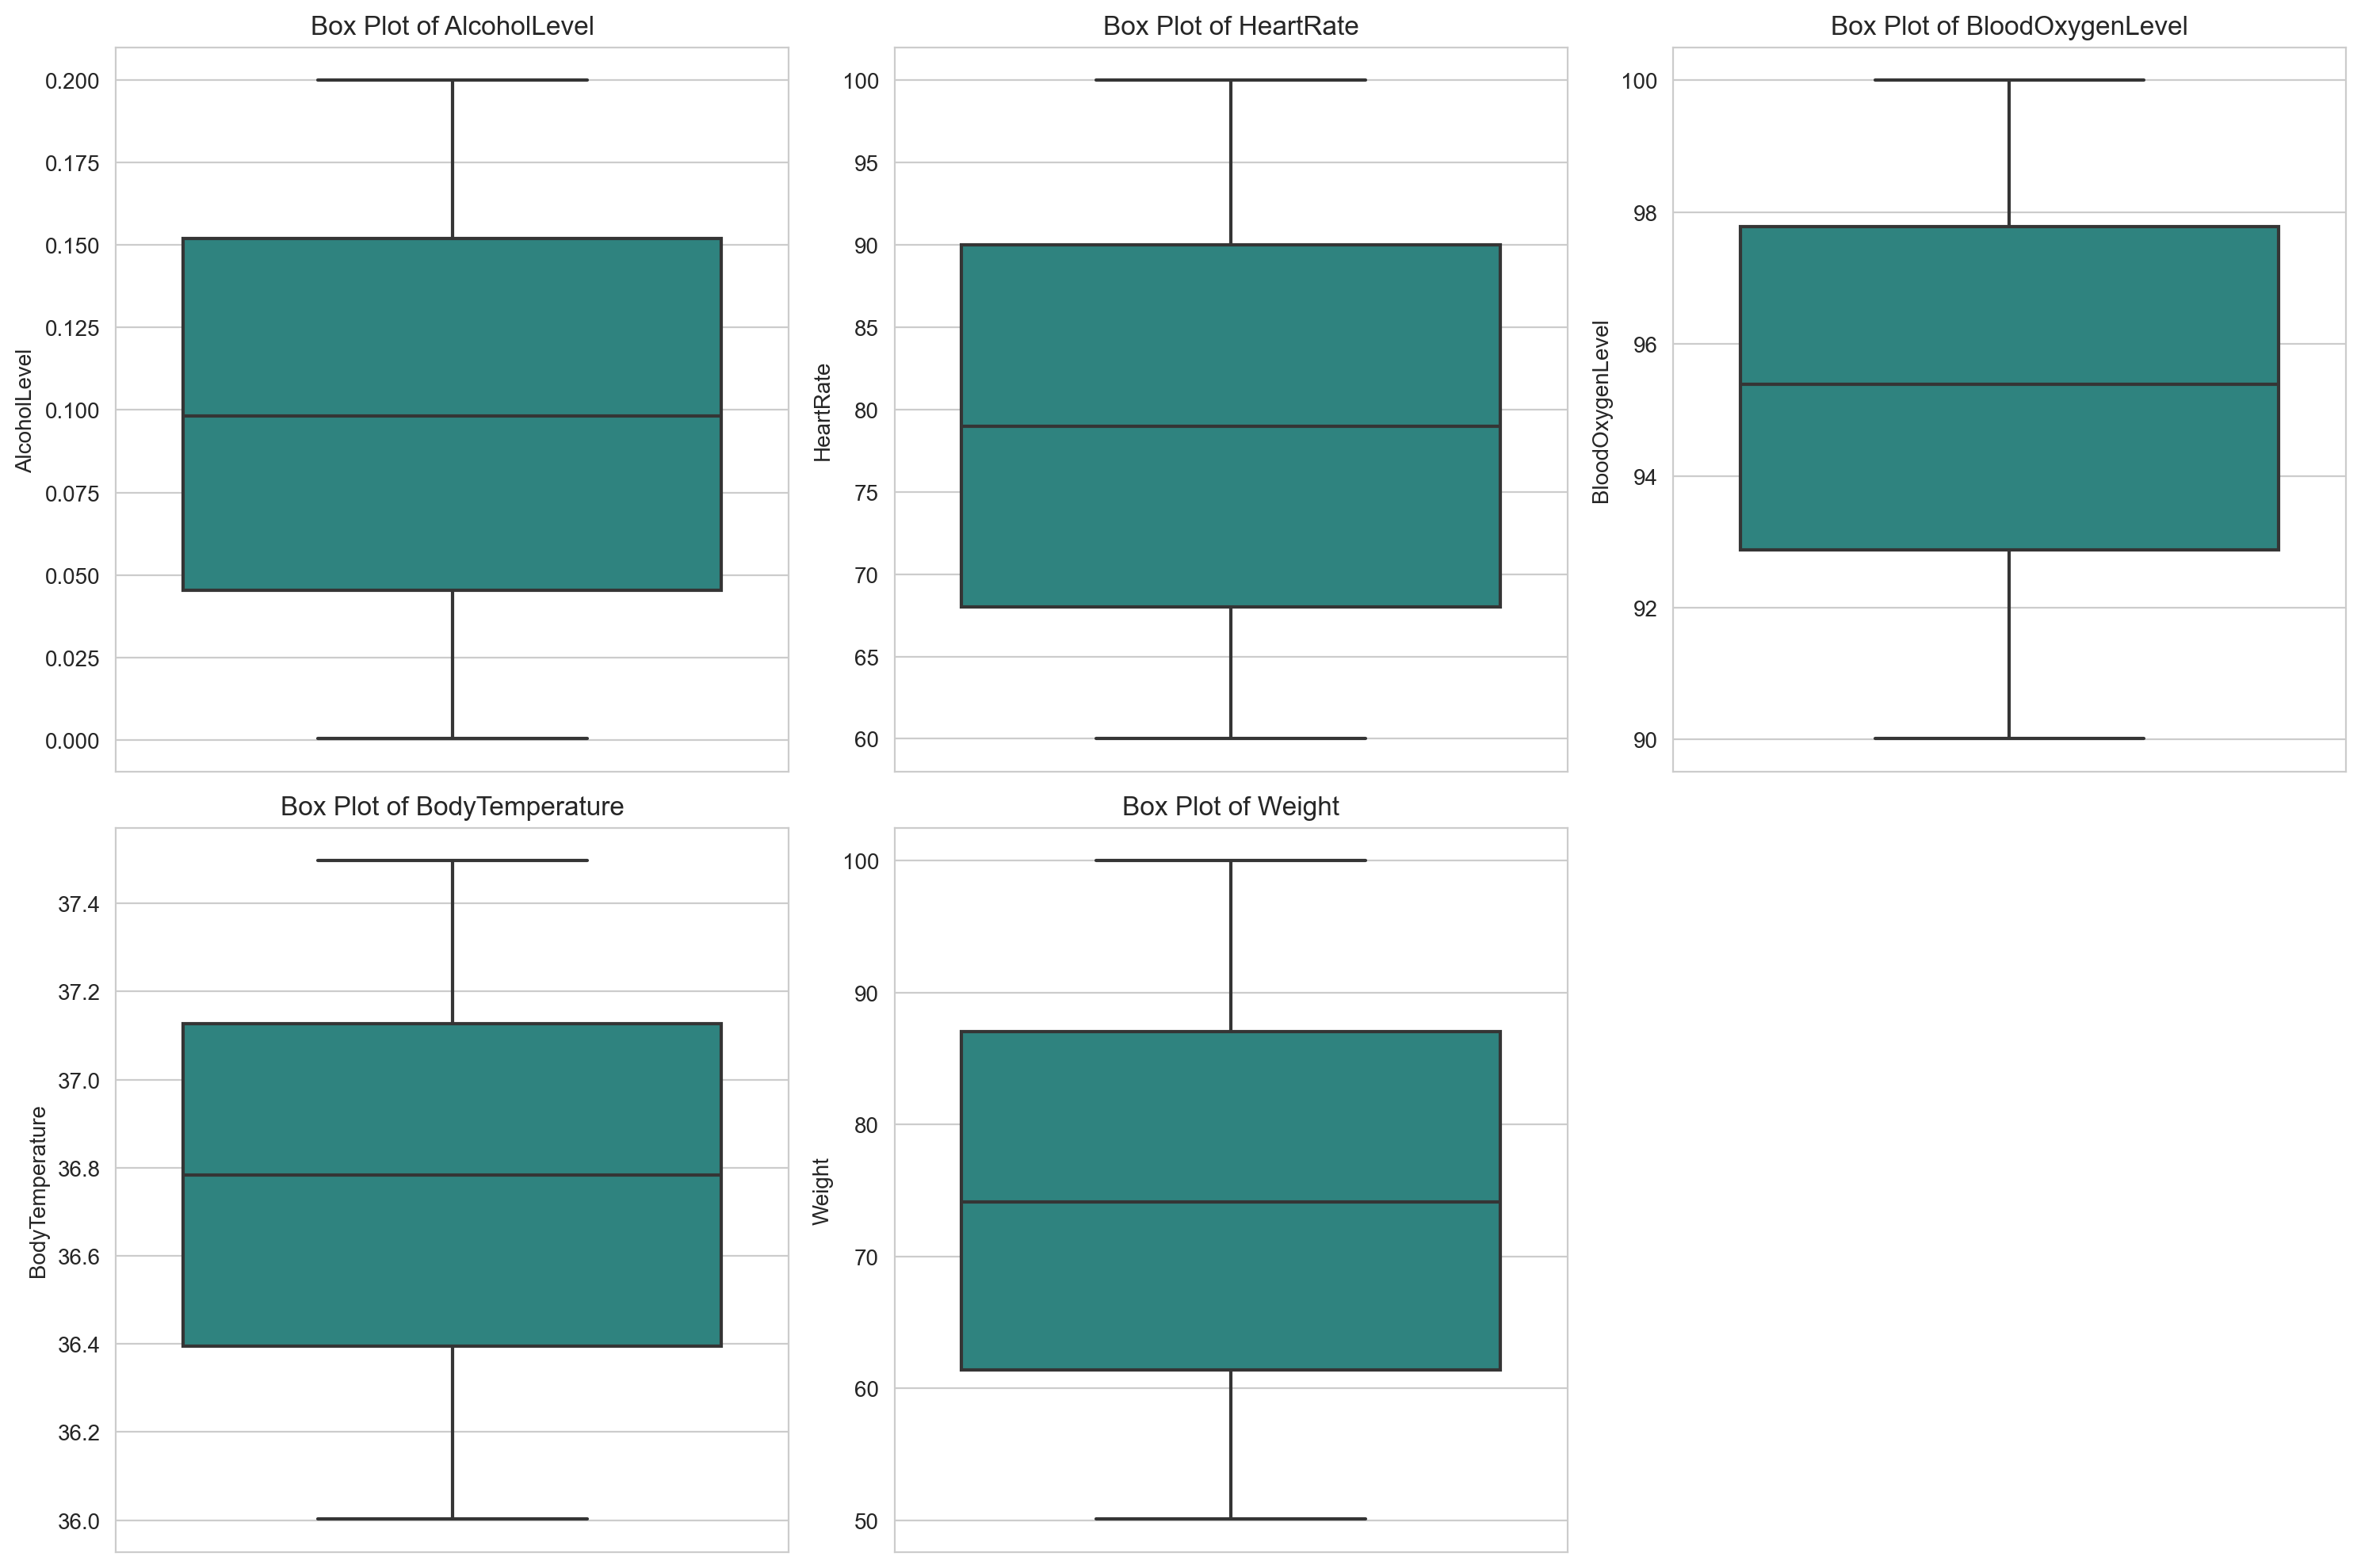

In [69]:
# Initialize the figure for box plots
plt.figure(figsize=(15, 10), dpi=200)

for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data[var], palette='viridis')  # Use the 'coolwarm' colormap
    plt.title(f'Box Plot of {var}')

plt.tight_layout()
plt.savefig('boxplots.png')
plt.show()

AlcoholLevel: There are outliers present, indicating some patients with significantly higher alcohol levels compared to the general population in the dataset.
HeartRate: The heart rate distribution shows some outliers on both the lower and higher ends, suggesting a few patients with unusually low or high heart rates.
BloodOxygenLevel: This metric also has outliers, primarily on the lower side, which might indicate patients with potential respiratory issues or measurement errors.
BodyTemperature: There are outliers on both ends, indicating some patients with lower and higher body temperatures than the typical range. High outliers may indicate febrile conditions.
Weight: The distribution of weight shows outliers, particularly on the higher end, indicating some patients are significantly heavier than the average.

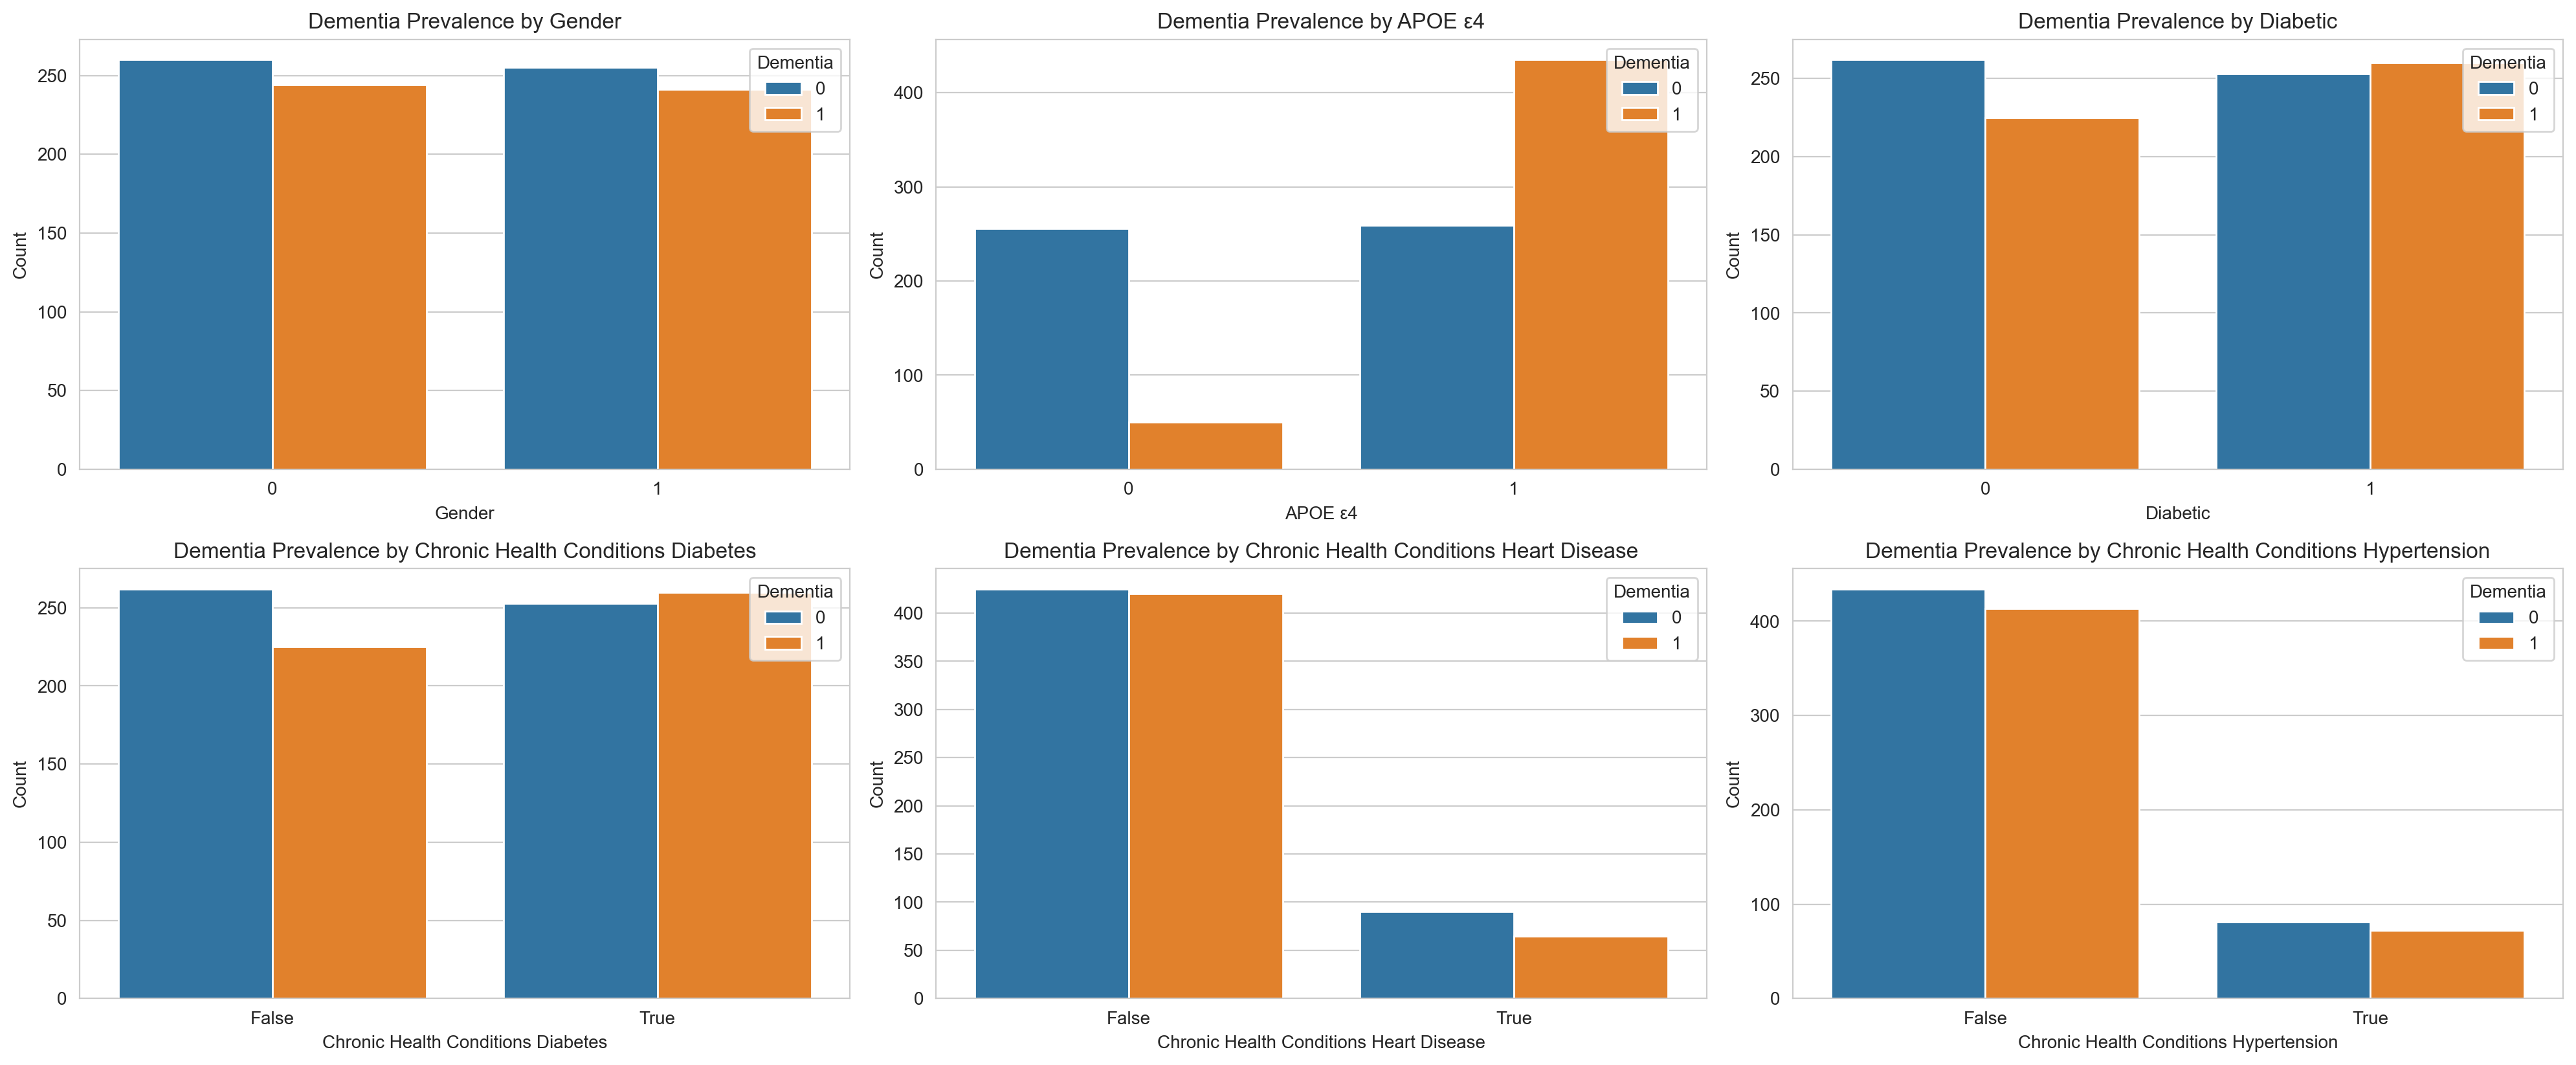

In [70]:
# List all column names to identify the correct ones for Chronic Health Conditions
[column for column in data.columns if "Chronic_Health_Conditions" in column]

# Categories for analysis
categories = ['Gender', 'APOE_ε4', 'Diabetic', 'Chronic_Health_Conditions_Diabetes', 
              'Chronic_Health_Conditions_Heart Disease', 'Chronic_Health_Conditions_Hypertension']

# Initialize the figure
plt.figure(figsize=(20, 12), dpi=200)

for i, category in enumerate(categories, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=category, hue='Dementia', data=data)
    plt.title(f'Dementia Prevalence by {category.replace("_", " ")}')
    plt.xlabel(category.replace("_", " "))
    plt.ylabel('Count')
    plt.legend(title='Dementia', loc='upper right')

plt.tight_layout()
plt.savefig('dementia_prevalence.png')
plt.show()


Gender: Shows the distribution of dementia cases between different genders, indicating potential gender-related differences in dementia prevalence.
APOE_ε4: Highlights the impact of the APOE ε4 allele, a known genetic risk factor for Alzheimer's disease, on dementia prevalence.
Diabetic: Compares dementia cases between diabetic and non-diabetic patients, suggesting how diabetes may influence dementia risk.
Chronic Health Conditions (Diabetes, Heart Disease, Hypertension, None): Illustrates the prevalence of dementia among patients with specific chronic conditions versus those with none, indicating the potential impact of these conditions on dementia risk.

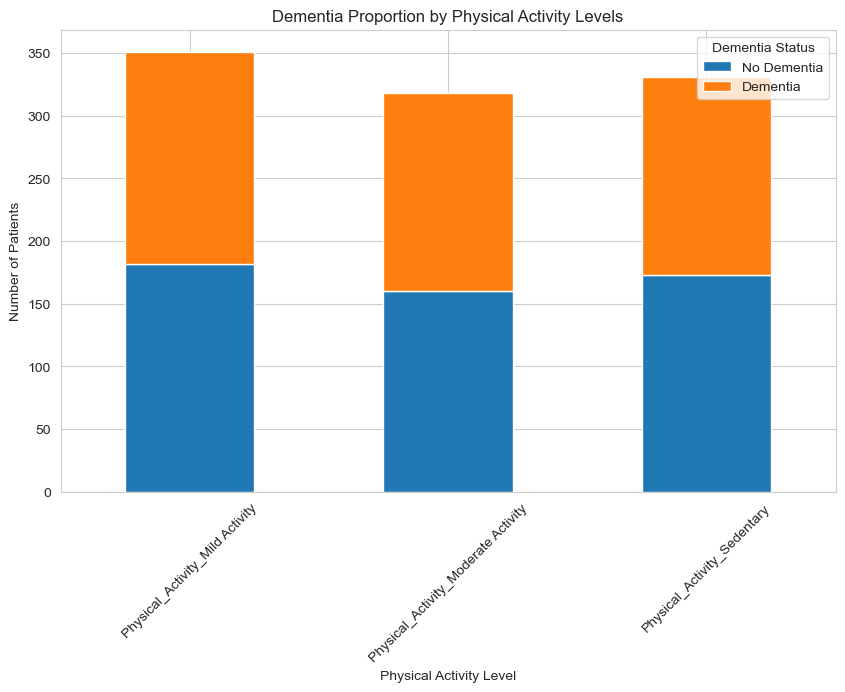

In [71]:
# Adjusting to use the one-hot encoded columns for Physical Activity
physical_activity_columns = [col for col in data.columns if col.startswith('Physical_Activity_')]

# Summing up the dementia cases and total cases for each level of physical activity
physical_activity_dementia = data[physical_activity_columns + ['Dementia']].groupby('Dementia').sum()

# Calculating proportions
physical_activity_proportions = physical_activity_dementia.T
physical_activity_proportions.columns = ['No Dementia', 'Dementia']

# Plotting
physical_activity_proportions.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Dementia Proportion by Physical Activity Levels')
plt.xlabel('Physical Activity Level')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.legend(title='Dementia Status', loc='upper right')
plt.savefig('dementia_proportion_physical_activity.png')
plt.show()


The bar chart shows the proportion of patients with and without dementia across different levels of physical activity, as indicated by the one-hot encoded variables. Each bar represents a level of physical activity, and the stacked segments within each bar indicate the number of patients with and without dementia.

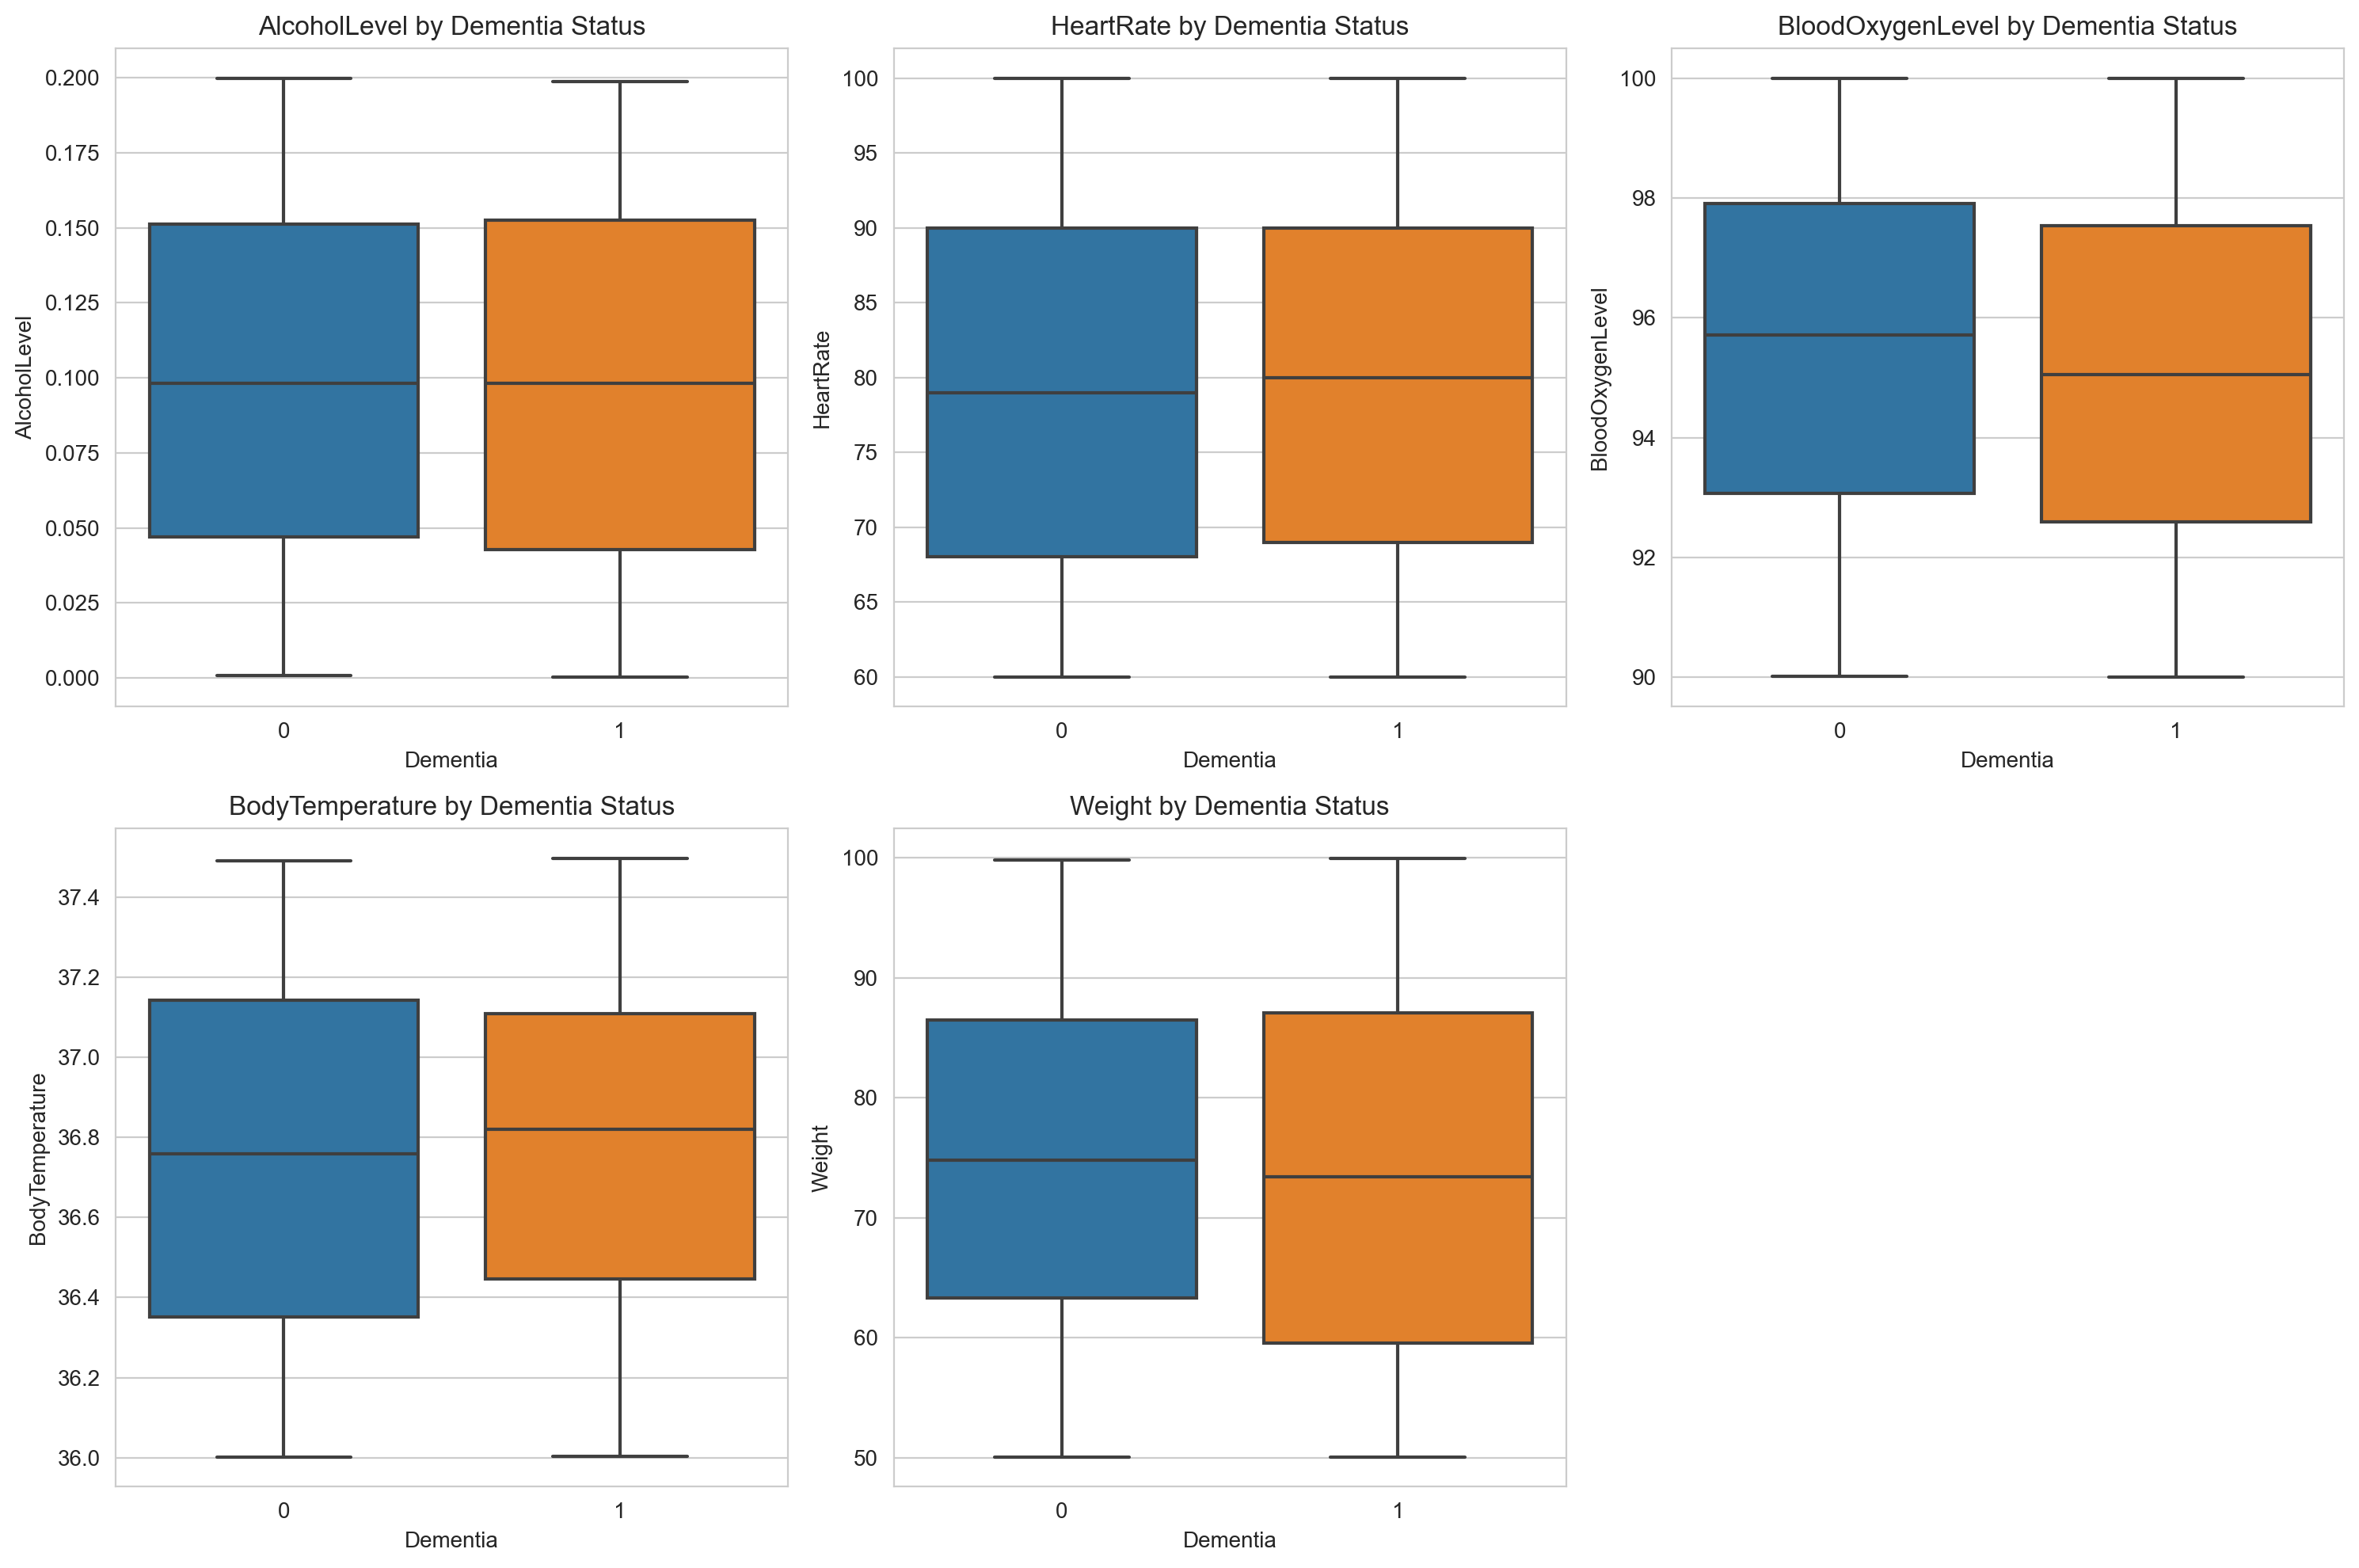

In [72]:
# Continuous variables to compare against dementia status
continuous_variables = ['AlcoholLevel', 'HeartRate', 'BloodOxygenLevel', 'BodyTemperature', 'Weight']

# Initialize the figure
plt.figure(figsize=(15, 10), dpi=200)

for i, var in enumerate(continuous_variables, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Dementia', y=var, data=data)
    plt.title(f'{var} by Dementia Status')

plt.tight_layout()
plt.savefig('continuous_variables.png')
plt.show()


AlcoholLevel: Shows the spread of alcohol levels in the blood between the two groups, which can indicate if alcohol consumption is associated with dementia.
HeartRate: Compares the heart rate distributions, providing insights into cardiovascular health relative to dementia status.
BloodOxygenLevel: Highlights differences in blood oxygen levels, which can reflect respiratory health and its potential impact on dementia.
BodyTemperature: Displays body temperature variations, potentially indicating health status differences between patients with and without dementia.
Weight: Compares weight distributions, offering perspectives on whether body weight is linked to dementia prevalence.

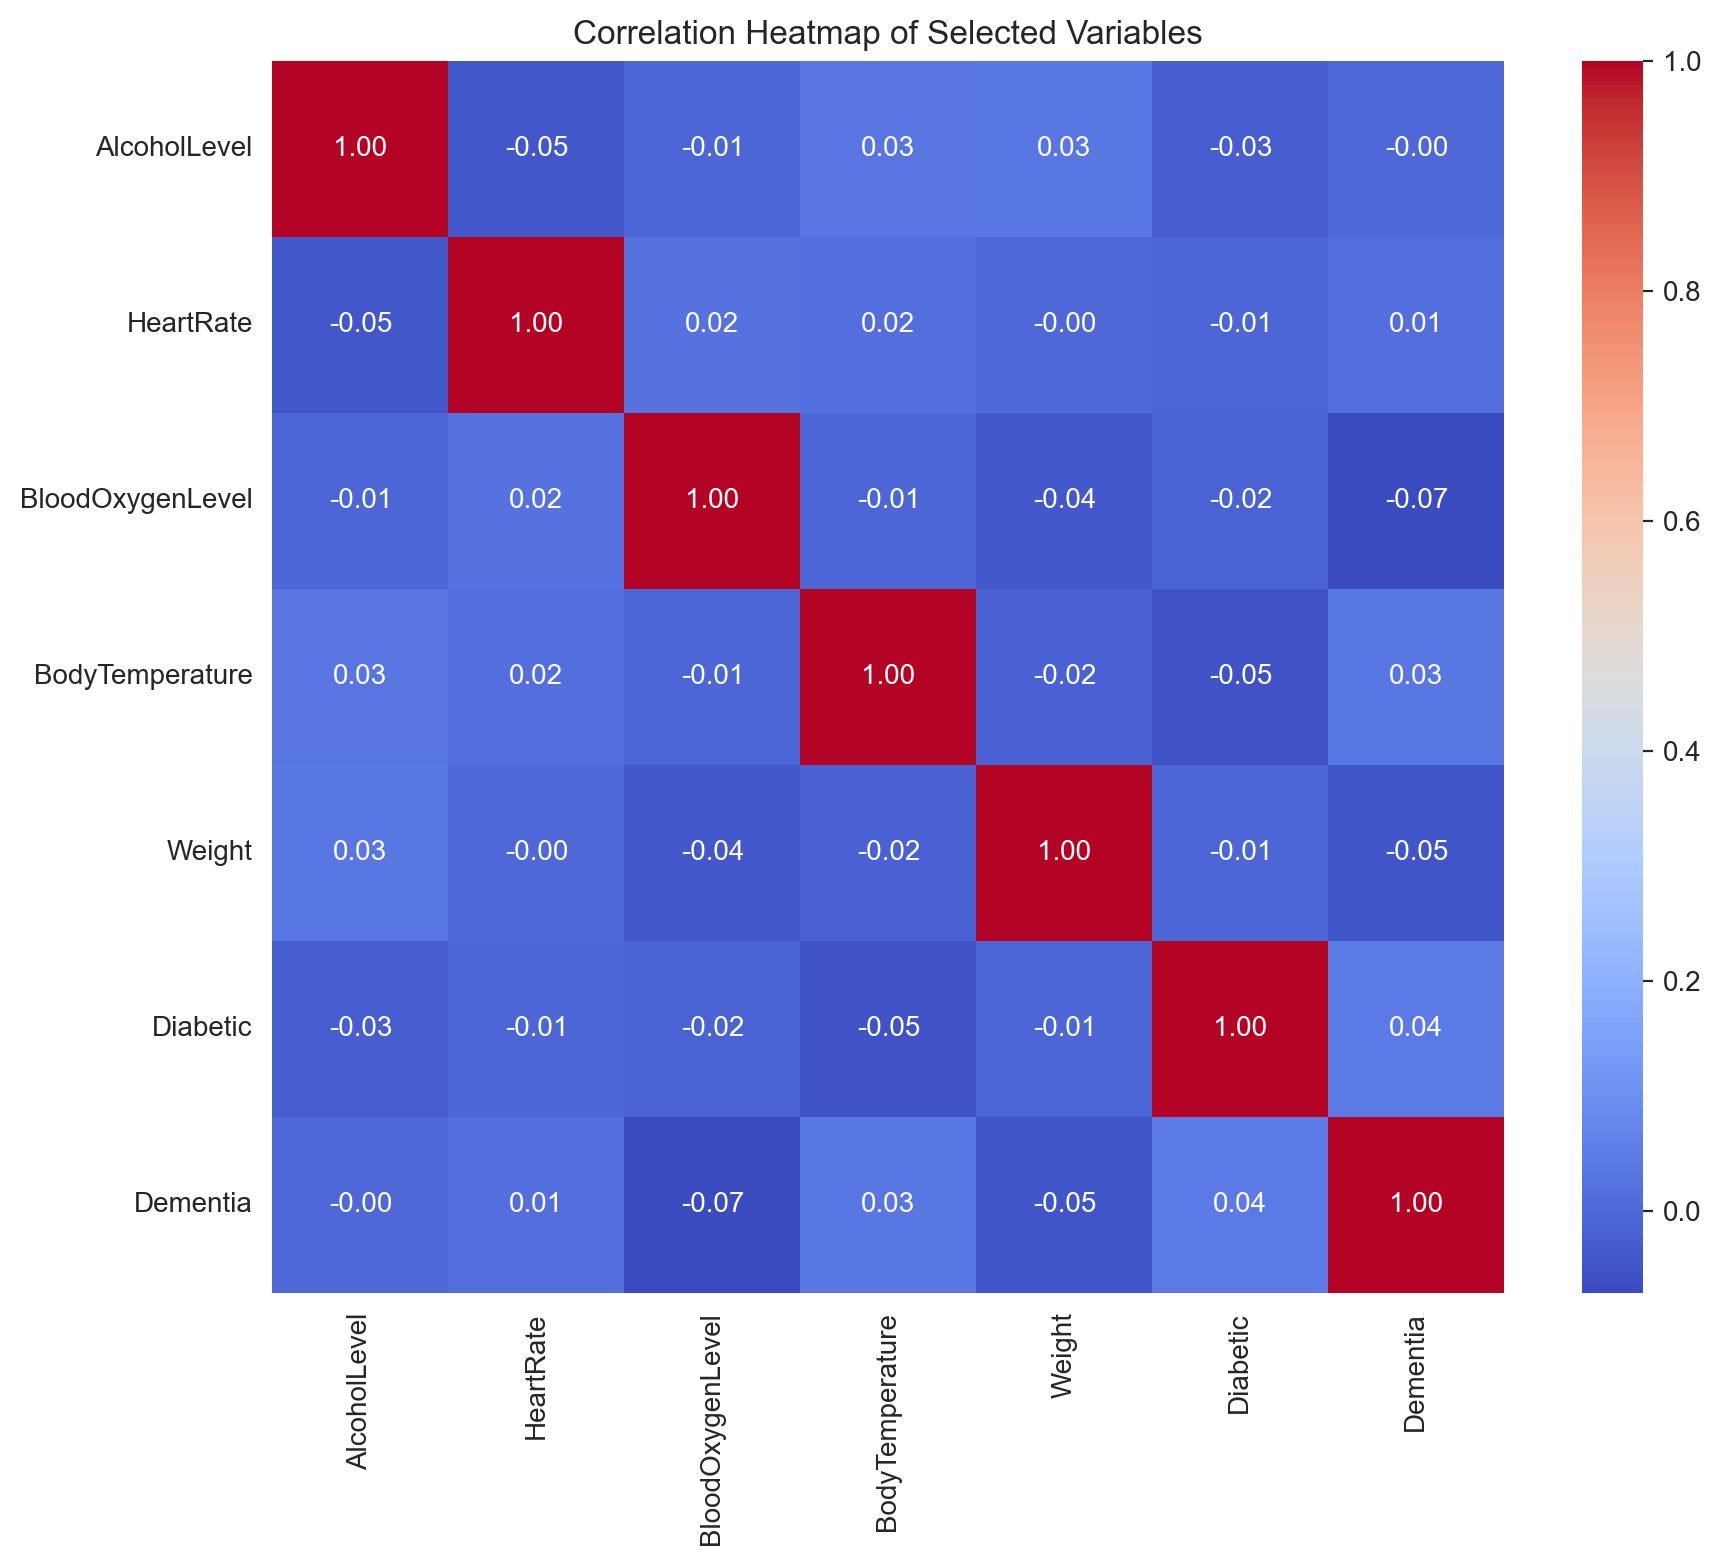

In [73]:
# Selecting a subset of variables for the correlation heatmap
selected_variables = [
    'AlcoholLevel', 'HeartRate', 'BloodOxygenLevel', 'BodyTemperature', 'Weight', 
    'Diabetic', 'Dementia'
]

# Calculate correlation matrix for the selected variables
corr_matrix_subset = data[selected_variables].corr()

# Initialize the figure for the heatmap
plt.figure(figsize=(10, 8), dpi=200)

# Generate a heatmap for the subset of variables
sns.heatmap(corr_matrix_subset, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap of Selected Variables')
plt.savefig('correlation_heatmap.png')
plt.show()



The correlation heatmap now focuses on a select group of variables, making it clearer and easier to interpret their relationships with dementia and with each other. This visualization highlights:

The correlation coefficients between each pair of selected variables, providing insights into potential associations.
The relationships between health metrics (like AlcoholLevel, HeartRate, BloodOxygenLevel, BodyTemperature, Weight) and Dementia, indicating how these factors might be linked to the presence of dementia.
The correlation between Diabetic status and Dementia, which could suggest a relationship between diabetes and the risk of developing dementia.

In [74]:
# Check for prescription-related columns in the transformed dataset
prescription_columns = [col for col in data.columns if "Prescription" in col]
prescription_columns


['Prescription_Donepezil',
 'Prescription_Galantamine',
 'Prescription_Memantine',
 'Prescription_None',
 'Prescription_Rivastigmine']

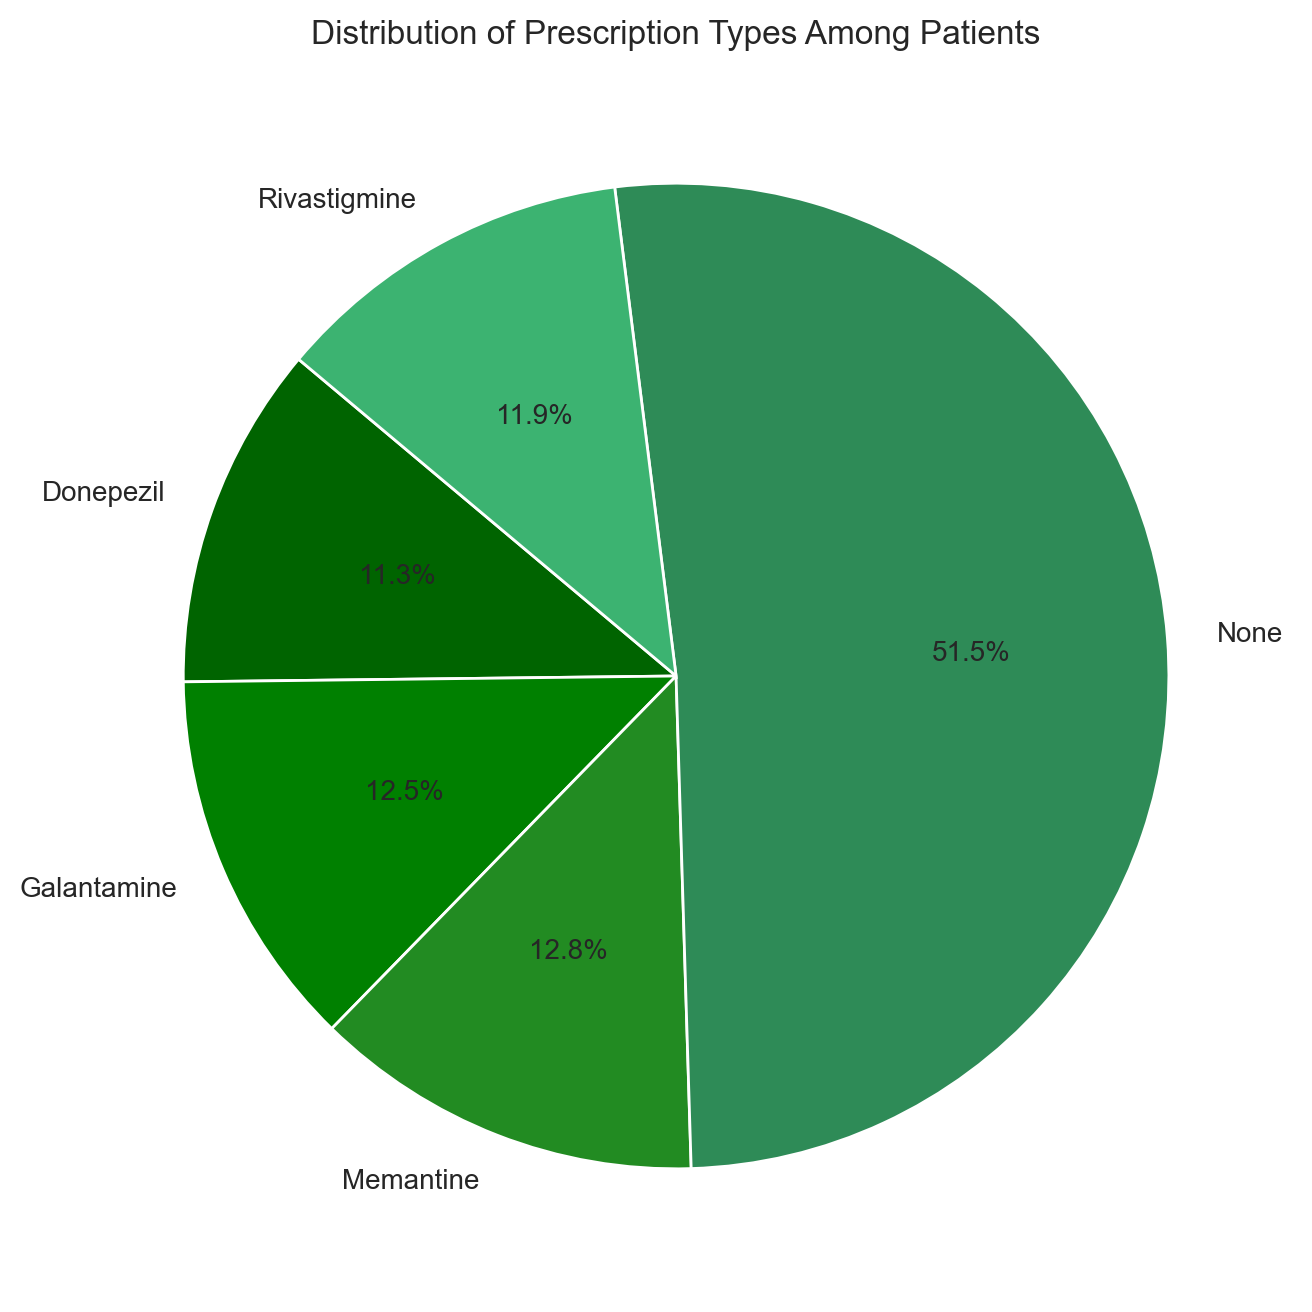

In [75]:
# Define a custom color palette
colors = ['#006400', '#008000', '#228B22', '#2E8B57', '#3CB371']

# Summing up the counts for each prescription type from the one-hot encoded columns
prescription_sums = data[prescription_columns].sum()

# Generate the pie chart with the adjusted prescription data
plt.figure(figsize=(8, 8), dpi=200)
plt.pie(prescription_sums, labels=prescription_sums.index.str.replace('Prescription_', ''), autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Prescription Types Among Patients')
plt.savefig('prescription_distribution.png')
plt.show()

In [76]:
# Check if Smoking_Status and Depression_Status are available in their original form
available_columns = [col for col in data.columns if "Smoking_Status" in col or "Depression_Status" in col]
available_columns


['Depression_Status',
 'Smoking_Status_Current Smoker',
 'Smoking_Status_Former Smoker',
 'Smoking_Status_Never Smoked']

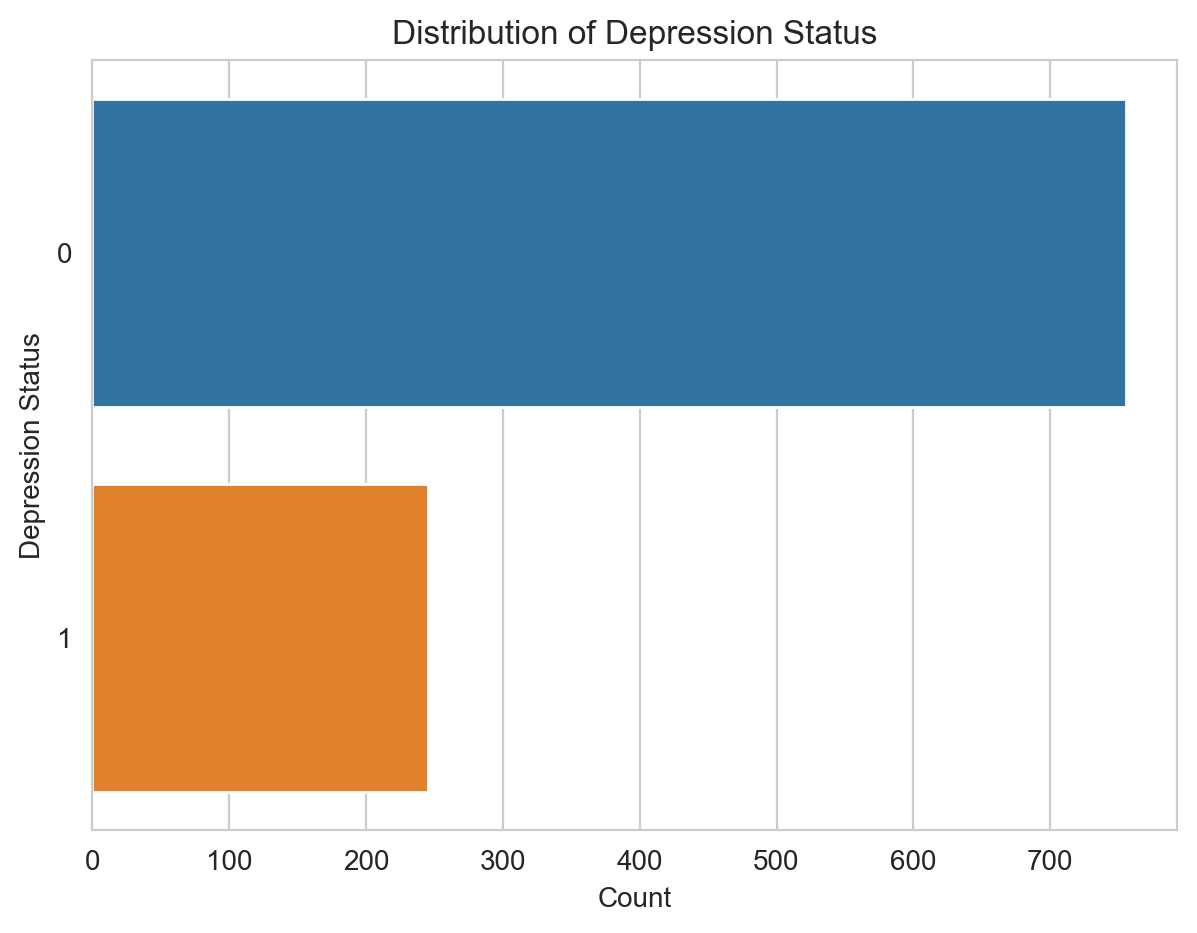

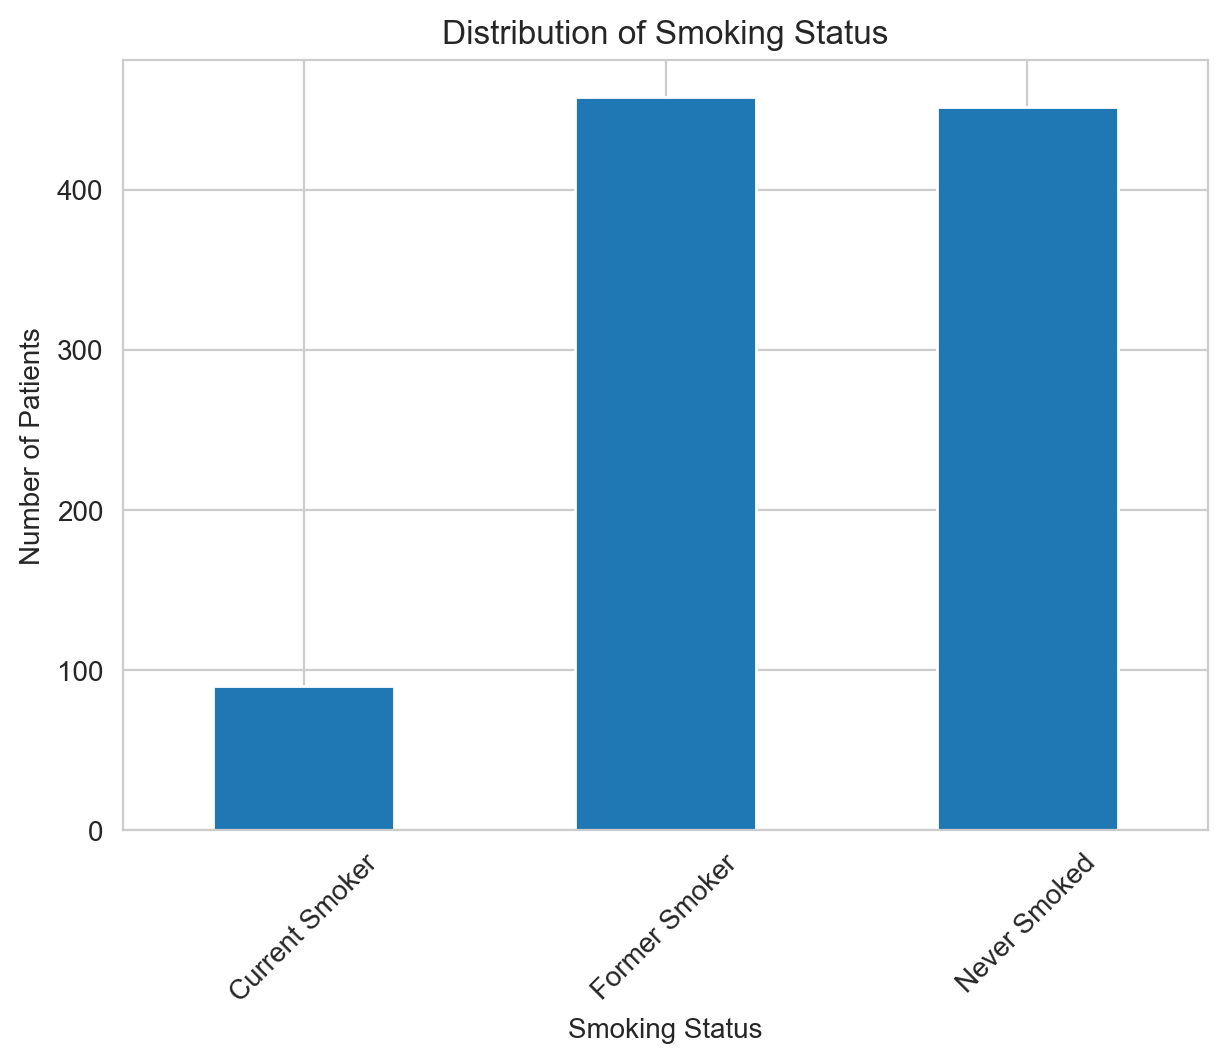

In [77]:
# Bar Chart for Depression Status
plt.figure(figsize=(7, 5), dpi=200)
sns.countplot(y='Depression_Status', data=data, order=data['Depression_Status'].value_counts().index)
plt.title('Distribution of Depression Status')
plt.xlabel('Count')
plt.ylabel('Depression Status')
plt.show()

# Summing up the counts for each smoking status from the one-hot encoded columns
smoking_status_sums = data[['Smoking_Status_Current Smoker', 'Smoking_Status_Former Smoker', 'Smoking_Status_Never Smoked']].sum()

# Bar Chart for Smoking Status
plt.figure(figsize=(7, 5), dpi=200)
smoking_status_sums.plot(kind='bar')
plt.title('Distribution of Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Number of Patients')
plt.xticks(ticks=range(len(smoking_status_sums)), labels=['Current Smoker', 'Former Smoker', 'Never Smoked'], rotation=45)
plt.savefig('smoking_status.png')
plt.show()


Depression Status: The bar chart shows how patients are distributed across different depression statuses, indicating the proportion of patients experiencing depression within the dataset.

Smoking Status: The second bar chart represents the distribution of smoking statuses among the patients, based on the one-hot encoded data. It highlights the number of current smokers, former smokers, and those who have never smoked, providing an overview of smoking habits within the patient cohort.

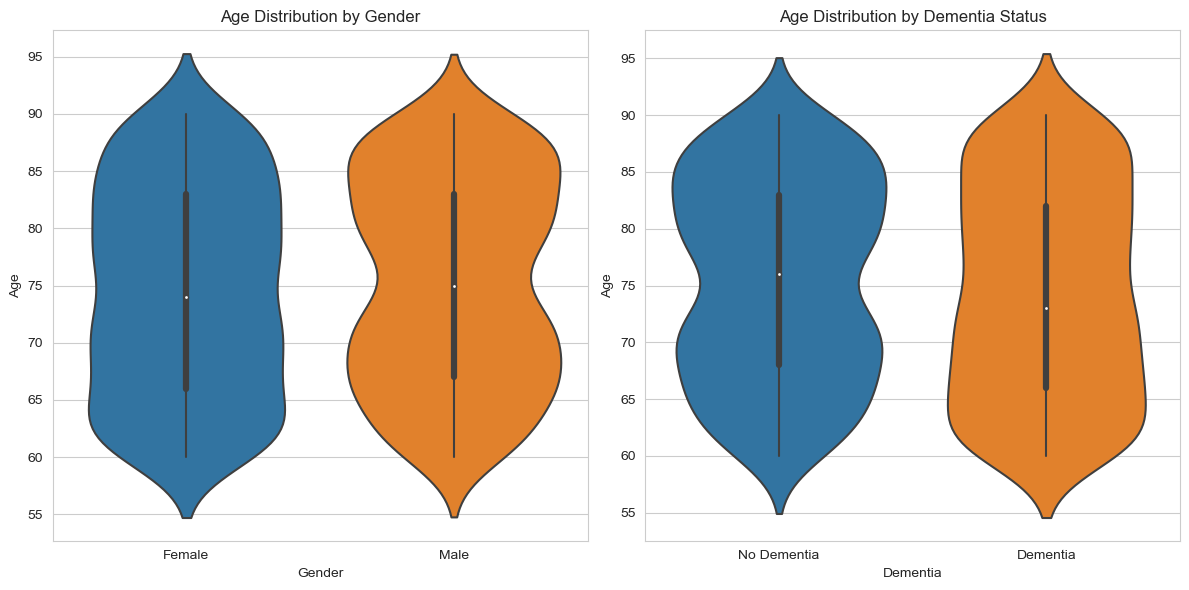

In [78]:
# Violin Plots for Age Distribution by Gender and Dementia Status
# Since Gender has been encoded, we'll revert to the original naming for visualization purposes
data['Gender'] = data['Gender'].map({0: 'Female', 1: 'Male'})

plt.figure(figsize=(12, 6))

# Age Distribution by Gender
plt.subplot(1, 2, 1)
sns.violinplot(x='Gender', y='Age', data=data)
plt.title('Age Distribution by Gender')

# Age Distribution by Dementia Status
plt.subplot(1, 2, 2)
sns.violinplot(x='Dementia', y='Age', data=data)
plt.title('Age Distribution by Dementia Status')
plt.xticks(ticks=[0, 1], labels=['No Dementia', 'Dementia'])

plt.tight_layout()
plt.savefig('age_distribution.png')
plt.show()


The violin plots provide a detailed look at the age distribution across different categories:

Age Distribution by Gender: This plot shows the age distribution for each gender, highlighting median age, interquartile range, and the overall distribution shape. The plot can help identify any gender-specific age patterns within the patient cohort.

Age Distribution by Dementia Status: The second plot compares the age distribution between patients with and without dementia. It illustrates differences in median age, spread, and distribution shape, offering insights into how age relates to dementia within this dataset.

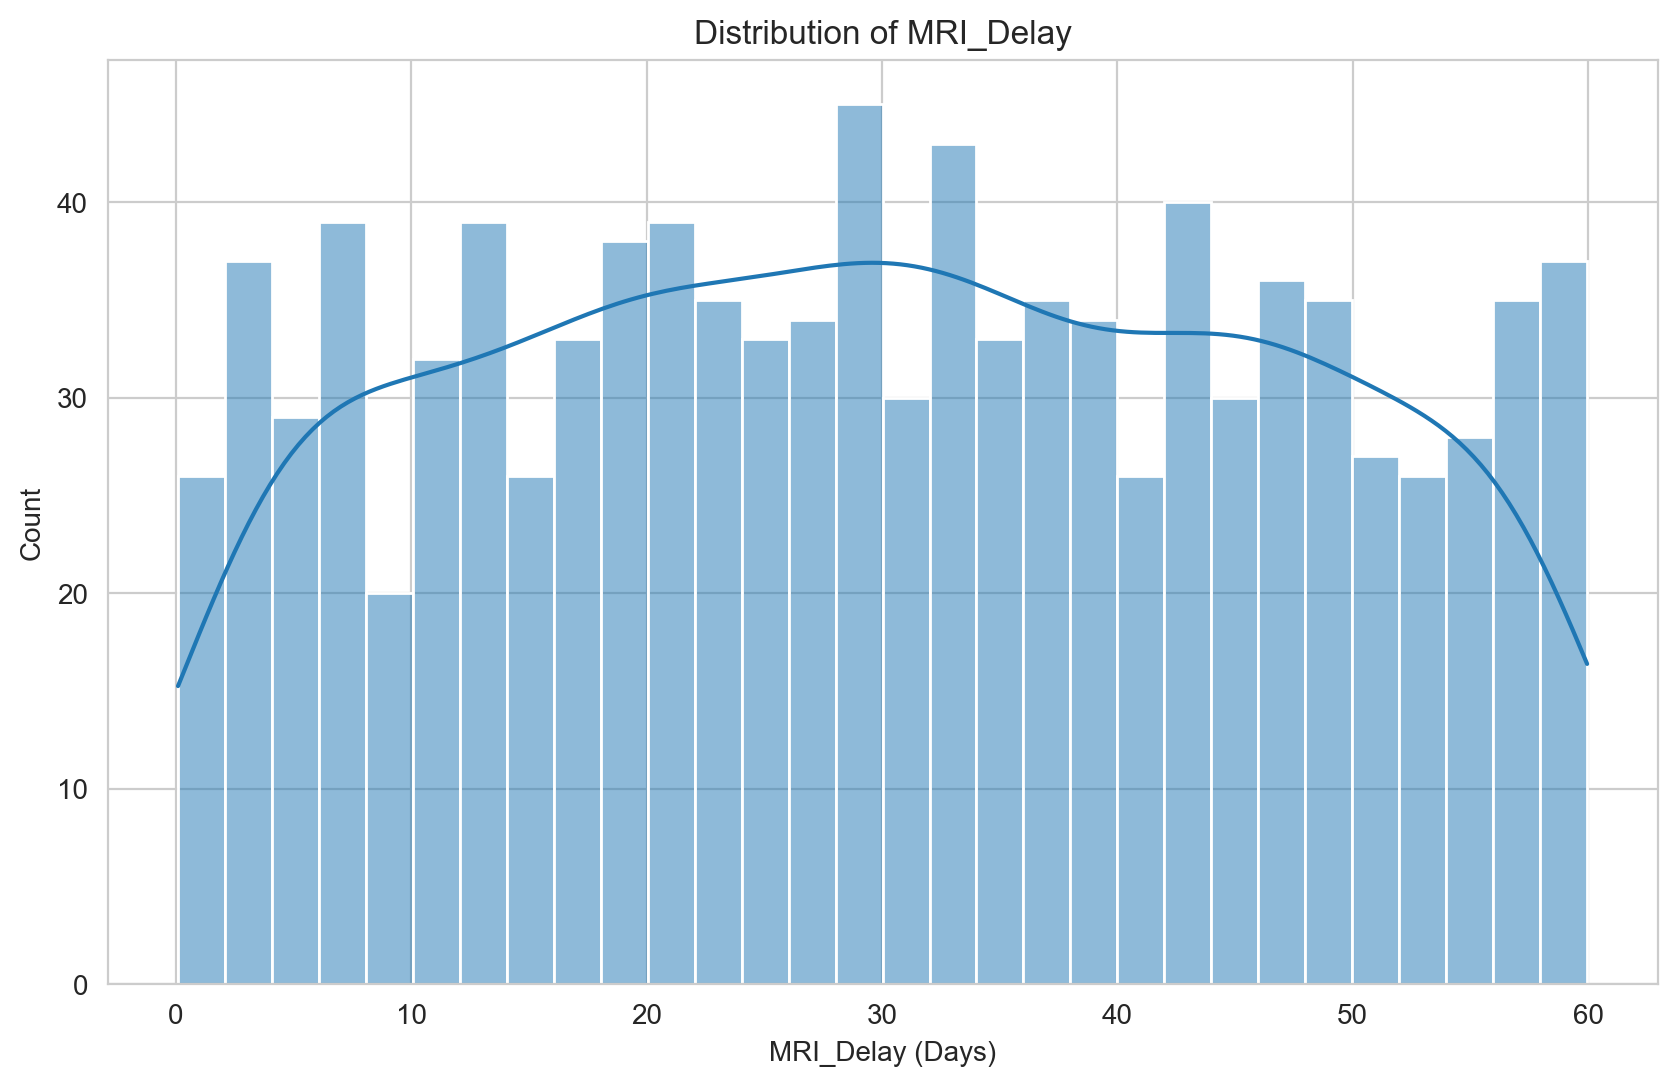

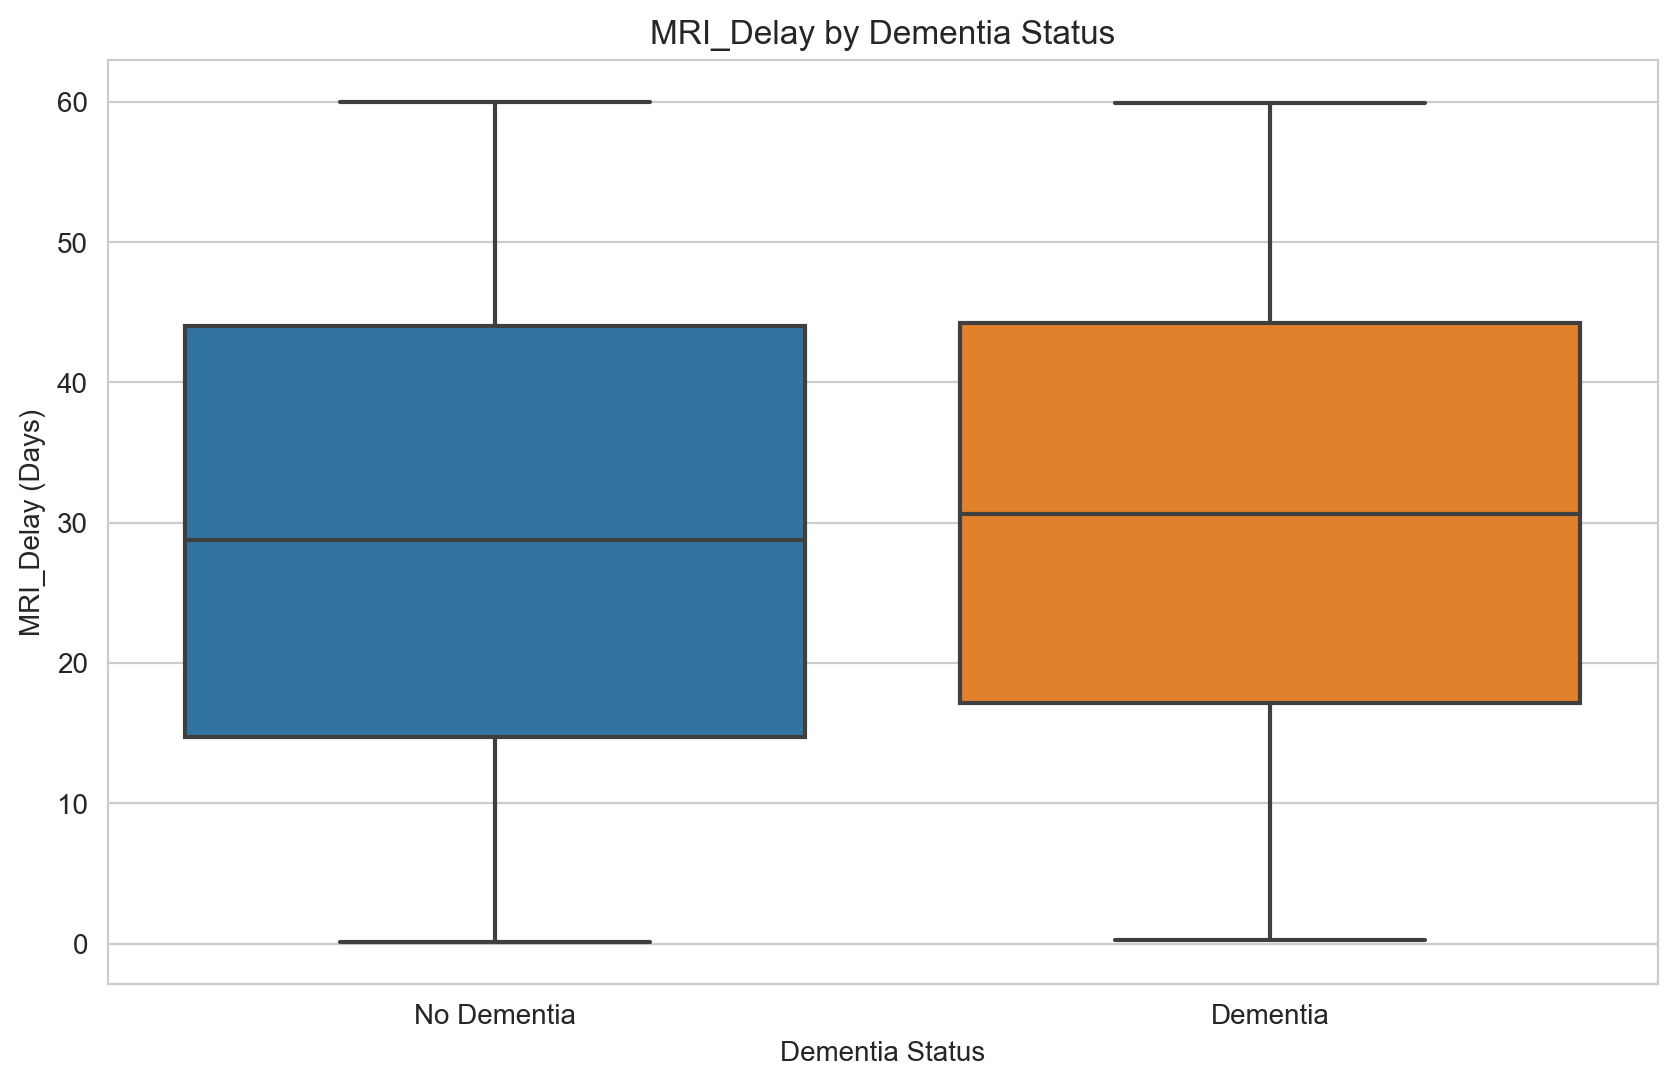

In [79]:
# Histogram for MRI_Delay Distribution
plt.figure(figsize=(10, 6), dpi=200)
sns.histplot(data['MRI_Delay'], bins=30, kde=True)
plt.title('Distribution of MRI_Delay')
plt.xlabel('MRI_Delay (Days)')
plt.ylabel('Count')
plt.savefig('mri_delay_distribution.png')
plt.show()

# Box Plot to Compare MRI_Delay by Dementia Status
plt.figure(figsize=(10, 6), dpi=200)
sns.boxplot(x='Dementia', y='MRI_Delay', data=data)
plt.title('MRI_Delay by Dementia Status')
plt.xlabel('Dementia Status')
plt.xticks(ticks=[0, 1], labels=['No Dementia', 'Dementia'])
plt.ylabel('MRI_Delay (Days)')
plt.savefig('mri_delay.png')
plt.show()


<Figure size 1920x1440 with 0 Axes>

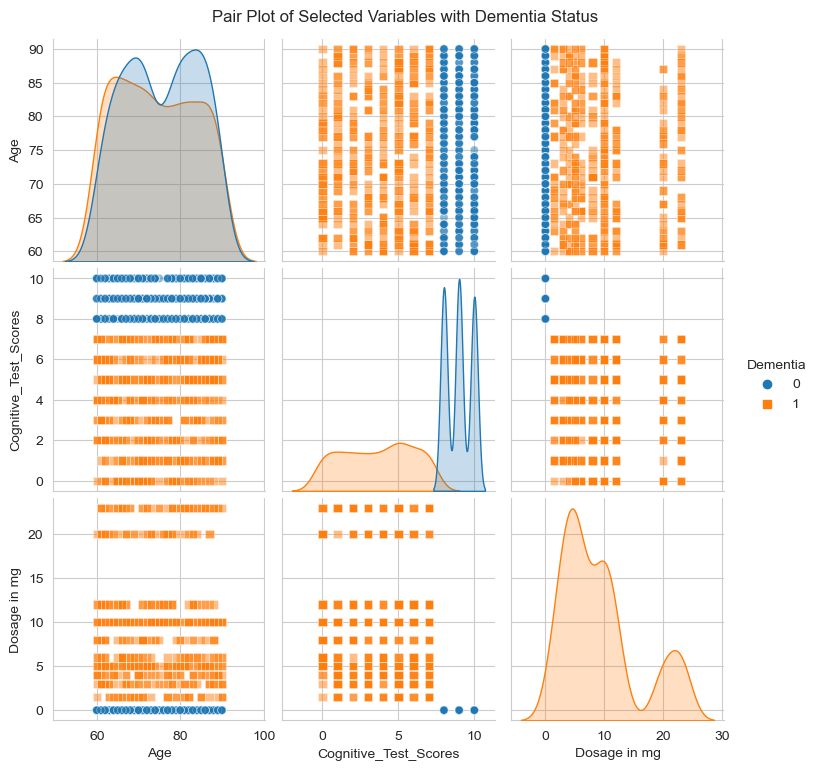

In [80]:
# Selecting variables for the pair plot
# For simplicity and visualization clarity, we'll include a manageable number of variables
selected_variables_for_pair_plot = [
    'Age', 'Cognitive_Test_Scores', 'Dosage in mg', 'Dementia'
]

# Set the figure DPI
plt.figure(dpi=300)

# Generate pair plot
sns.pairplot(data[selected_variables_for_pair_plot], hue='Dementia', diag_kind='kde', markers=["o", "s"], plot_kws={'alpha': 0.5})
plt.suptitle('Pair Plot of Selected Variables with Dementia Status', y=1.02)  # Adjust title position
plt.savefig('pair_plot.png')
plt.show()

Distribution Patterns: The diagonal shows the distribution of each variable, separated by dementia status, using kernel density estimation. This reveals how each metric's distribution differs between patients with and without dementia.
Pairwise Relationships: The scatter plots in the off-diagonal positions show relationships between pairs of variables, again separated by dementia status. These can highlight correlations or differences in patterns between patients with and without dementia.
Dementia Status Differentiation: Using dementia status as the hue provides a clear visual distinction between the groups, helping to identify variables and relationships that might be particularly relevant to understanding and predicting dementia.


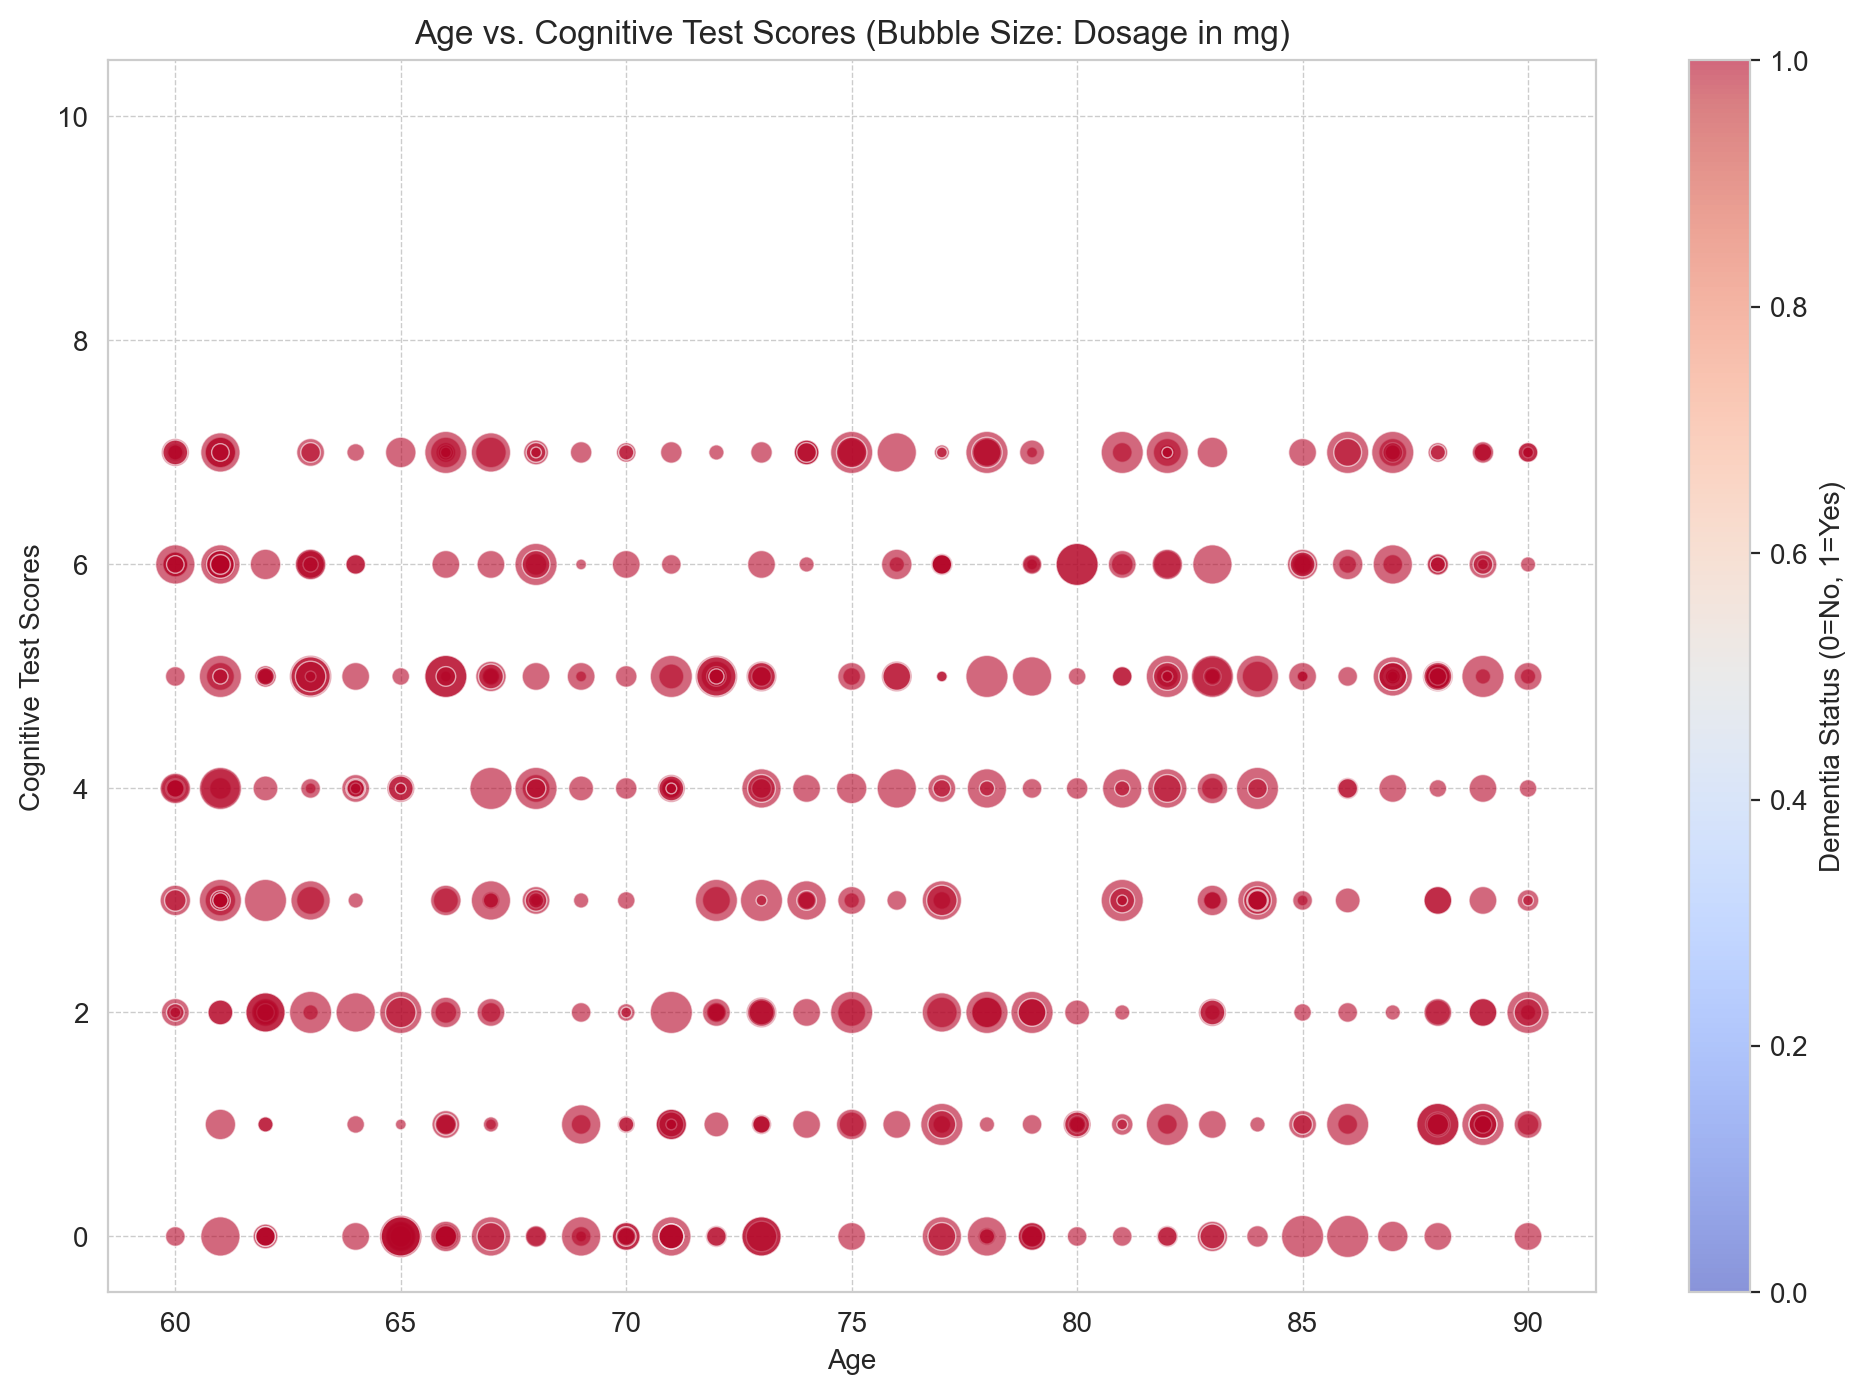

In [81]:
# Adjusting the visualization to ensure visibility and correctness

# Remove the filtering to include all patients
# Adjusting bubble sizes (Dosage in mg) directly, ensuring they are visible
bubble_sizes = data['Dosage in mg'] * 10  # Adjust size for visibility, assuming no dosage as minimal value

plt.figure(figsize=(12, 8), dpi=200)  # Set the figure DPI

# Creating the scatter plot
scatter = plt.scatter(
    'Age', 
    'Cognitive_Test_Scores',
    s=bubble_sizes,  # Use adjusted dosage for bubble size
    c=data['Dementia'],  # Use Dementia status for color
    cmap='coolwarm',
    alpha=0.6,
    data=data,
    edgecolor='w',  # White edge for better visibility
    linewidth=0.5
)

# Adding a colorbar to represent dementia status
plt.colorbar(scatter, label='Dementia Status (0=No, 1=Yes)')

plt.title('Age vs. Cognitive Test Scores (Bubble Size: Dosage in mg)')
plt.xlabel('Age')
plt.ylabel('Cognitive Test Scores')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.savefig('scatter_plot.png')
plt.show()

Age and Cognitive Test Scores Relationship: The scatter plot provides a view of how cognitive test scores vary with age among patients, potentially highlighting patterns related to cognitive decline or stability across different age groups.
Dosage in mg Dimension: The size of each bubble represents the dosage of medication in milligrams, allowing us to observe how medication dosages relate to both age and cognitive performance. Larger bubbles indicate higher dosages, which might be associated with more severe cases or different treatment strategies.
Dementia Status Differentiation: The color gradient reflects the dementia status of patients, facilitating the identification of any trends in how patients with and without dementia are distributed across age and cognitive test score ranges.

Hypothesis 1: Test if there is a significant difference in cognitive test scores between patients with and without dementia.

Null hypothesis (H0): There is no difference in cognitive test scores between patients with and without dementia.
Alternative hypothesis (H1): There is a significant difference in cognitive test scores between patients with and without dementia.

In [82]:
from scipy import stats

# Data preparation: Separate cognitive test scores based on dementia status
scores_with_dementia = data[data['Dementia'] == 1]['Cognitive_Test_Scores']
scores_without_dementia = data[data['Dementia'] == 0]['Cognitive_Test_Scores']

# Check for normality to decide between t-test and Mann-Whitney U test
# Perform Shapiro-Wilk test for normality on both groups
sw_test_dementia = stats.shapiro(scores_with_dementia)
sw_test_no_dementia = stats.shapiro(scores_without_dementia)

sw_test_dementia, sw_test_no_dementia


(ShapiroResult(statistic=0.921599268913269, pvalue=3.3616313044711665e-15),
 ShapiroResult(statistic=0.7963999509811401, pvalue=6.706199246440185e-25))

In [83]:
# Perform Mann-Whitney U test to compare cognitive test scores
mwu_result = stats.mannwhitneyu(scores_with_dementia, scores_without_dementia, alternative='two-sided')

mwu_result


MannwhitneyuResult(statistic=0.0, pvalue=1.2095261470139271e-167)

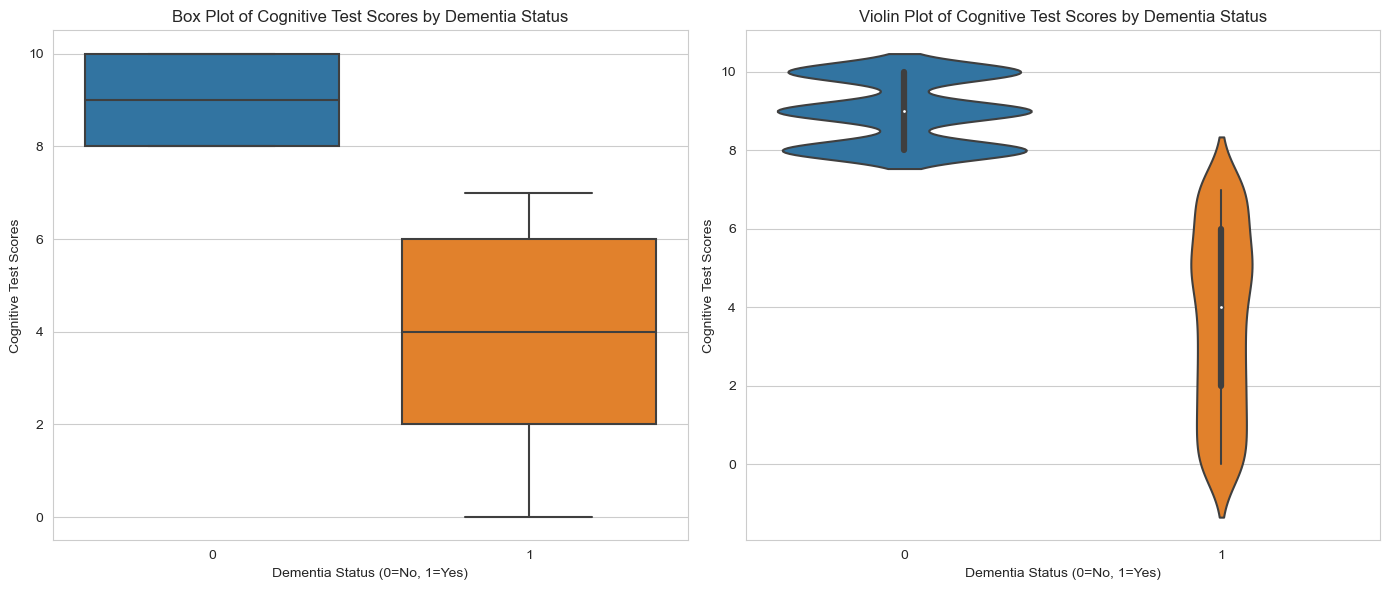

In [84]:
plt.figure(figsize=(14, 6))

# Box Plot
plt.subplot(1, 2, 1)
sns.boxplot(x='Dementia', y='Cognitive_Test_Scores', data=data)
plt.title('Box Plot of Cognitive Test Scores by Dementia Status')
plt.xlabel('Dementia Status (0=No, 1=Yes)')
plt.ylabel('Cognitive Test Scores')

# Violin Plot
plt.subplot(1, 2, 2)
sns.violinplot(x='Dementia', y='Cognitive_Test_Scores', data=data)
plt.title('Violin Plot of Cognitive Test Scores by Dementia Status')
plt.xlabel('Dementia Status (0=No, 1=Yes)')
plt.ylabel('Cognitive Test Scores')

plt.tight_layout()
plt.savefig('cognitive_test_scores.png')
plt.show()


Interpretation:
The significant difference in cognitive test scores supports the hypothesis that dementia status is associated with cognitive performance as measured in this dataset. Patients with dementia have different cognitive test score distributions compared to those without dementia, which aligns with expectations given the impact of dementia on cognitive functions.

This finding underscores the importance of cognitive testing in the diagnosis and monitoring of dementia. It also highlights the potential of cognitive test scores as a diagnostic marker or a measure of disease progression in patients with dementia.

Box Plot: Shows the median, quartiles, and outliers for cognitive test scores within each group. The plot highlights the central tendency and variability, indicating a clear difference in the distribution of scores between patients with dementia and those without.

Violin Plot: Provides a more detailed view of the score distributions, including their shape, density, and spread. This plot reveals the full distribution of cognitive test scores, showing how scores are distributed across the two groups and highlighting differences in median scores and distribution shapes

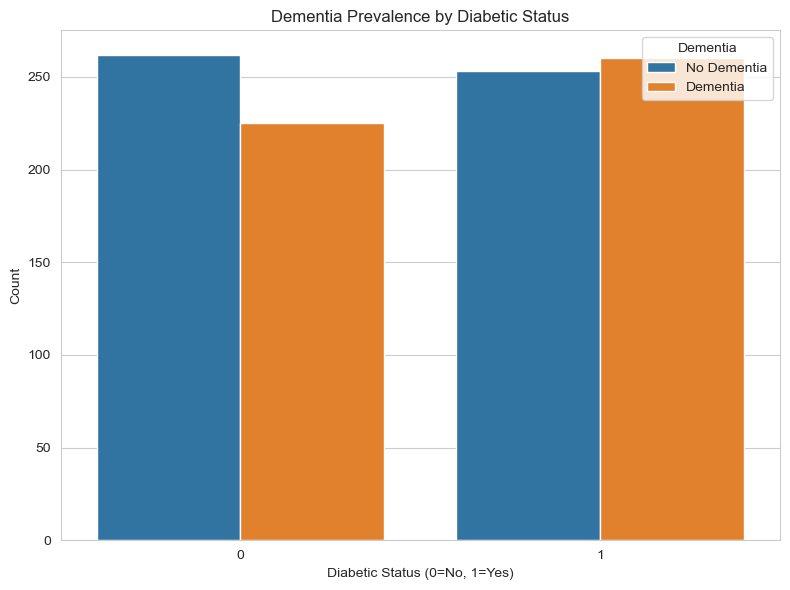

In [85]:
# Visualization of Dementia Prevalence by Diabetic Status
plt.figure(figsize=(8, 6))
sns.countplot(x='Diabetic', hue='Dementia', data=data)
plt.title('Dementia Prevalence by Diabetic Status')
plt.xlabel('Diabetic Status (0=No, 1=Yes)')
plt.ylabel('Count')
plt.legend(title='Dementia', labels=['No Dementia', 'Dementia'])
plt.tight_layout()
plt.show()


The bar chart visualizes the prevalence of dementia among diabetic and non-diabetic patients. It compares the count of patients with and without dementia within each diabetic status group. Key observations from the visualization include:

The distribution of patients with and without dementia across diabetic and non-diabetic groups.
Both diabetic and non-diabetic groups include patients with and without dementia, but the difference in dementia prevalence between these groups is not statistically significant based on the Chi-square test results.

KeyError: "['Physical_Activity'] not in index"